## Imports

In [2]:
import numpy as np

import sys

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl

from astropy import units as u
from astropy import constants as const
from astropy.table import QTable

from pathlib import Path
import os

import import_ipynb
from Analysis_functions import extract_data, means_plots, means_calc

sys.path.insert(0, '/home/emelie/Desktop/Codes/PETAR/PeTar-master/tools/')
from analysis import *

importing Jupyter notebook from Analysis_functions.ipynb


In [3]:
plt.rcParams.update({'xtick.labelsize':13, 'ytick.labelsize':13, 'axes.titlesize':16, 
                     'axes.grid':True, 'axes.labelsize':15, 'legend.fontsize':13})

## Importing data

Creating headers for all printed timesteps. They become objects that contain the following information:
- "fid" = the file ID
- "time" = the number of the timestep
- "n" = number of particles
- "pos_offset" = position offset created when including external potential
- "vel_offset" = velocity offset created when including external potential

In [3]:
#notebook_path = Path.cwd()

#data_path = Path('Result_files')

#total_path = os.path.join(notebook_path, data_path)

#print(total_path)

# 100,000 particles, 10 steps, no external potential

In [4]:
run1_100000part_nopot, run1_header = extract_data(r'data_test_short', r'Trialrun_100000part_10steps', 10, 1)

print(run1_100000part_nopot.shape)

Number of particles is conserved: True
(100000, 19, 11)


In [6]:
#print(run1_header)

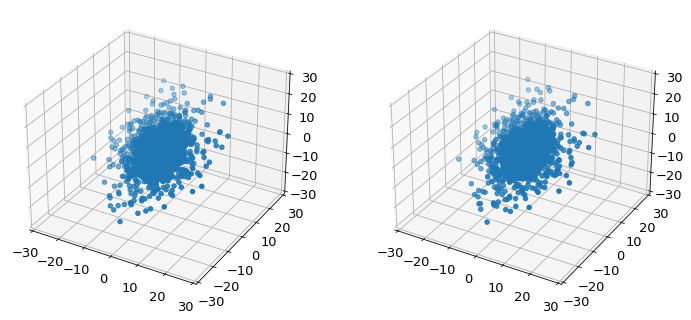

In [22]:
fig1 = plt.figure(figsize=(12,12))


ax0_run1 = fig1.add_subplot(221, projection='3d')
ax0_run1.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax0_run1.scatter3D(run1_100000part_nopot[:, 1, 0], run1_100000part_nopot[:, 2, 0], run1_100000part_nopot[:, 2, 0])

ax5_run1 = fig1.add_subplot(222, projection='3d')
ax5_run1.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax5_run1.scatter3D(run1_100000part_nopot[:, 1, 5], run1_100000part_nopot[:, 2, 5], run1_100000part_nopot[:, 2, 5])

plt.show()

### Animation:

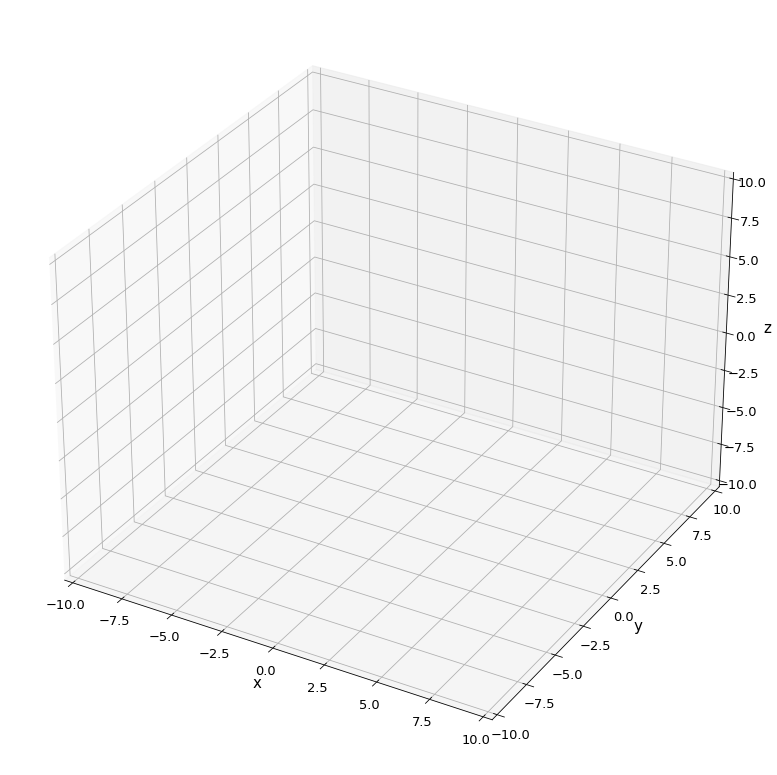

In [13]:
f_anim_run1 = np.arange(0, 11, 1)


fig_anim_run1 = plt.figure(figsize=(14,14)) 
ax_anim_run1 = fig_anim_run1.add_subplot(projection = '3d')

scatter1 = ax_anim_run1.scatter([], [], [], c='b', s=20, alpha=0.5)

anim_color3d = mpl.colors.Normalize(vmin=0, vmax=1200)
anim_cmap3d = mpl.cm.ScalarMappable(norm=anim_color3d, cmap=mpl.cm.cool)



def init_anim_run1(): 
    scatter1.set_color(anim_cmap3d.to_rgba(np.arange(0, 10000, 1)))
    
    ax_anim_run1.set_xlabel('x')
    ax_anim_run1.set_ylabel('y')
    ax_anim_run1.set_zlabel('z') 
    
    ax_anim_run1.set_xlim(xmin=-10, xmax=10)
    ax_anim_run1.set_ylim(ymin=-10, ymax=10)
    ax_anim_run1.set_zlim(zmin=-10, zmax=10)
    
    plt.show()
    
    return scatter1, 

def update_anim_run1(frame):
    scatter1._offsets3d = (run1_100000part_nopot[:, 1, frame], run1_100000part_nopot[:, 2, frame], run1_100000part_nopot[:, 3, frame])
    
    scatter_data = np.hstack((run1_100000part_nopot[:, 1, frame], prun1_100000part_nopot[:, 2, frame], 
                              run1_100000part_nopot[:, 3, frame]))
    scatter1.set_offsets(scatter_data) 
    
    return scatter1, 



animation_plots_run1 = animation.FuncAnimation(fig_anim_run1, update_anim_run1, 
                                                    frames=f_anim_run1, init_func=init_anim_run1)

writervideo = animation.PillowWriter(fps=2)
animation_plots_run1.save('Anim_test_run1.gif', writer=writervideo)

# 10,000 particles, 10 steps, no external potential

In [23]:
run2_10000part_nopot = extract_data(r'data_test_small', r'Trialrun_10000part_10steps', 10, 1)

print(np.shape(run2_10000part_nopot))

(10000, 19, 11)


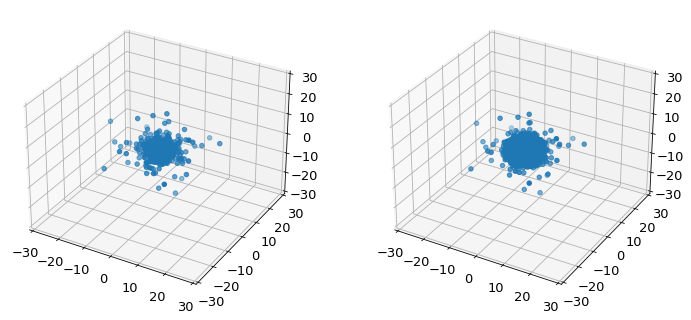

In [24]:
fig2 = plt.figure(figsize=(12,12))


ax0_10000part = fig2.add_subplot(221, projection='3d')
ax0_10000part.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax0_10000part.scatter3D(run2_10000part_nopot[:, 1, 0], run2_10000part_nopot[:, 2, 0], run2_10000part_nopot[:, 3, 0])

ax5_10000part = fig2.add_subplot(222, projection='3d')
ax5_10000part.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax5_10000part.scatter3D(run2_10000part_nopot[:, 1, 5], run2_10000part_nopot[:, 2, 5], run2_10000part_nopot[:, 3, 5])

plt.show()

### Animation:

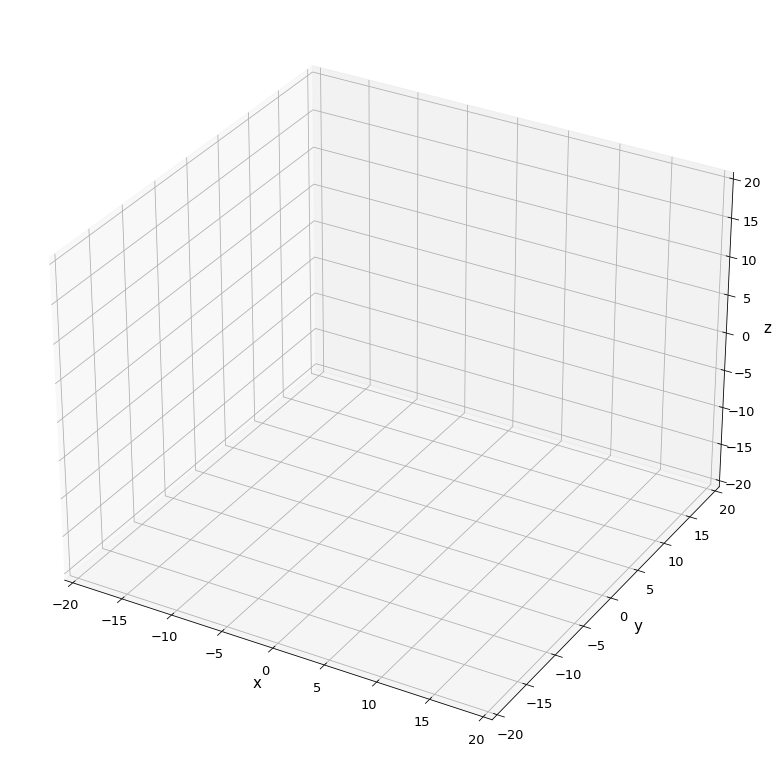

In [30]:
f_anim_10000part_nopot = np.arange(0, 11, 1)


fig_anim_10000part_nopot = plt.figure(figsize=(14,14)) 
ax_anim_10000part_nopot = fig_anim_10000part_nopot.add_subplot(projection = '3d')

scatter1 = ax_anim_10000part_nopot.scatter([], [], [], c='b', s=20, alpha=0.5)

anim_color3d = mpl.colors.Normalize(vmin=0, vmax=1200)
anim_cmap3d = mpl.cm.ScalarMappable(norm=anim_color3d, cmap=mpl.cm.plasma)



def init_anim_10000part_nopot(): 
    scatter1.set_color(anim_cmap3d.to_rgba(np.arange(0, 10000, 1)))
    
    ax_anim_10000part_nopot.set_xlabel('x')
    ax_anim_10000part_nopot.set_ylabel('y')
    ax_anim_10000part_nopot.set_zlabel('z') 
    
    ax_anim_10000part_nopot.set_xlim(xmin=-20, xmax=20)
    ax_anim_10000part_nopot.set_ylim(ymin=-20, ymax=20)
    ax_anim_10000part_nopot.set_zlim(zmin=-20, zmax=20)
    
    plt.show()
    
    return scatter1, 

def update_anim_10000part_nopot(frame):
    scatter1._offsets3d = (run2_10000part_nopot[:, 0, frame], run2_10000part_nopot[:, 1, frame], run2_10000part_nopot[:, 2, frame])
    
    scatter_data = np.hstack((run2_10000part_nopot[:, :, frame], run2_10000part_nopot[:, :, frame], 
                              run2_10000part_nopot[:, :, frame]))
    scatter1.set_offsets(scatter_data) 
    
    return scatter1, 



animation_plots_10000part_nopot = animation.FuncAnimation(fig_anim_10000part_nopot, update_anim_10000part_nopot, 
                                                    frames=f_anim_10000part_nopot, init_func=init_anim_10000part_nopot)

writervideo = animation.PillowWriter(fps=2)
animation_plots_10000part_nopot.save('Anim_test_small_cluster.gif', writer=writervideo)

# 10,000 particles, 10 steps, with external potential

In [25]:
run3_10000part_extpot = extract_data(r'data_test_ext_pot', r'Trialrun_10000part_10steps_externalpot', 10, 1)

print(np.shape(run3_10000part_extpot))

(10000, 19, 11)


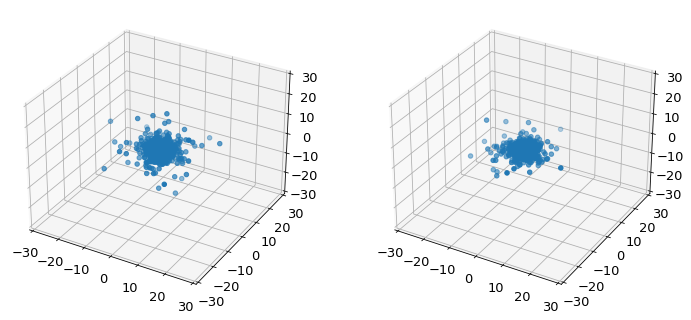

In [26]:
fig3 = plt.figure(figsize=(12,12))


ax0_extpot = fig3.add_subplot(221, projection='3d')
ax0_extpot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax0_extpot.scatter3D(run3_10000part_extpot[:, 1, 0], run3_10000part_extpot[:, 2, 0], run3_10000part_extpot[:, 3, 0])

ax5_extpot = fig3.add_subplot(222, projection='3d')
ax5_extpot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax5_extpot.scatter3D(run3_10000part_extpot[:, 1, 5], run3_10000part_extpot[:, 2, 5], run3_10000part_extpot[:, 3, 5])

plt.show()

### Animation:

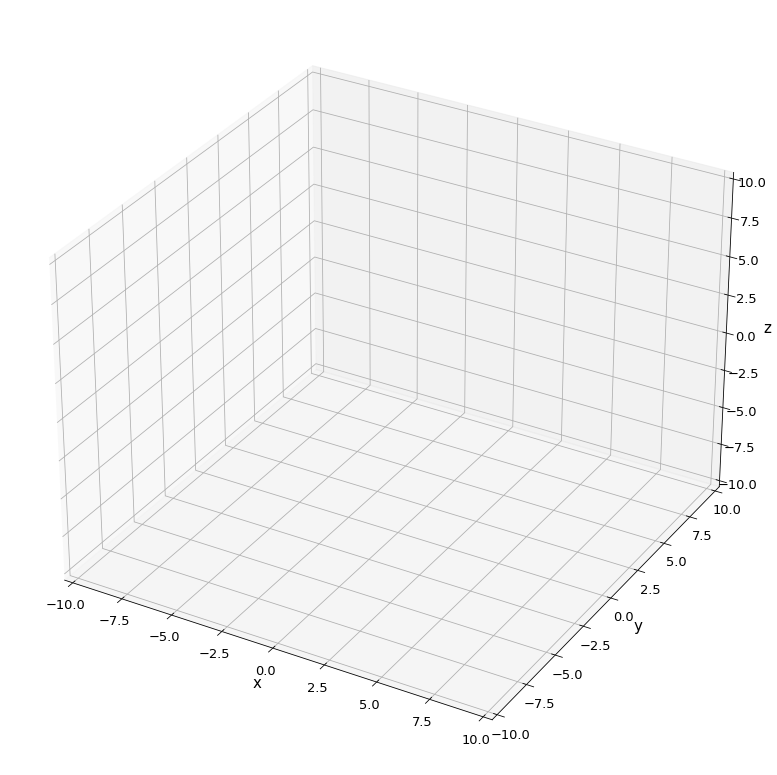

In [41]:
f_anim_extpot = np.arange(0, 11, 1)


fig_anim_extpot = plt.figure(figsize=(14,14)) 
ax_anim_extpot = fig_anim_extpot.add_subplot(projection = '3d')

scatter1 = ax_anim_extpot.scatter([], [], [], c='b', s=20, alpha=0.5)

anim_color3d = mpl.colors.Normalize(vmin=0, vmax=1200)
anim_cmap3d = mpl.cm.ScalarMappable(norm=anim_color3d, cmap=mpl.cm.plasma)



def init_anim_extpot(): 
    scatter1.set_color(anim_cmap3d.to_rgba(np.arange(0, 10000, 1)))
    
    ax_anim_extpot.set_xlabel('x')
    ax_anim_extpot.set_ylabel('y')
    ax_anim_extpot.set_zlabel('z') 
    
    ax_anim_extpot.set_xlim(xmin=-10, xmax=10)
    ax_anim_extpot.set_ylim(ymin=-10, ymax=10)
    ax_anim_extpot.set_zlim(zmin=-10, zmax=10)
    
    plt.show()
    
    return scatter1, 

def update_anim_extpot(frame):
    scatter1._offsets3d = (positions_extpot[:, 0, frame], positions_extpot[:, 1, frame], positions_extpot[:, 2, frame])
    
    scatter_data = np.hstack((positions_extpot[:, :, frame], positions_extpot[:, :, frame], 
                              positions_extpot[:, :, frame]))
    scatter1.set_offsets(scatter_data) 
    
    return scatter1, 



animation_plots_extpot = animation.FuncAnimation(fig_anim_extpot, update_anim_extpot, 
                                                    frames=f_anim_extpot, init_func=init_anim_extpot)

writervideo = animation.PillowWriter(fps=2)
animation_plots_extpot.save('Anim_test_extpot_cluster.gif', writer=writervideo)

## 10,000 particles, 10 steps, external potential, no binaries

In [20]:
run4_10000part_extpot_nob = extract_data(r'data_test_extpot_nob', r'Trialrun_10000part_10steps_extpot_nob', 10, 1)

print(run4_10000part_extpot_nob.shape)

(10000, 19, 11)


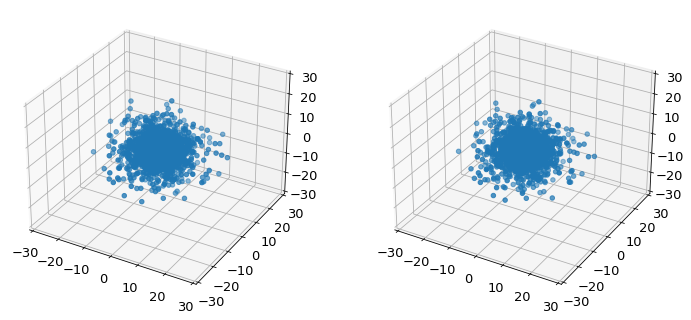

In [9]:
fig4 = plt.figure(figsize=(12,12))


ax0_nob = fig1.add_subplot(221, projection='3d')
ax0_nob.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax0_nob.scatter3D(positions[:, 0, 0], positions[:, 1, 0], positions[:, 2, 0])

ax5_nob = fig1.add_subplot(222, projection='3d')
ax5_nob.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax5_nob.scatter3D(positions[:, 0, 5], positions[:, 1, 5], positions[:, 2, 5])

plt.show()

### Animation:

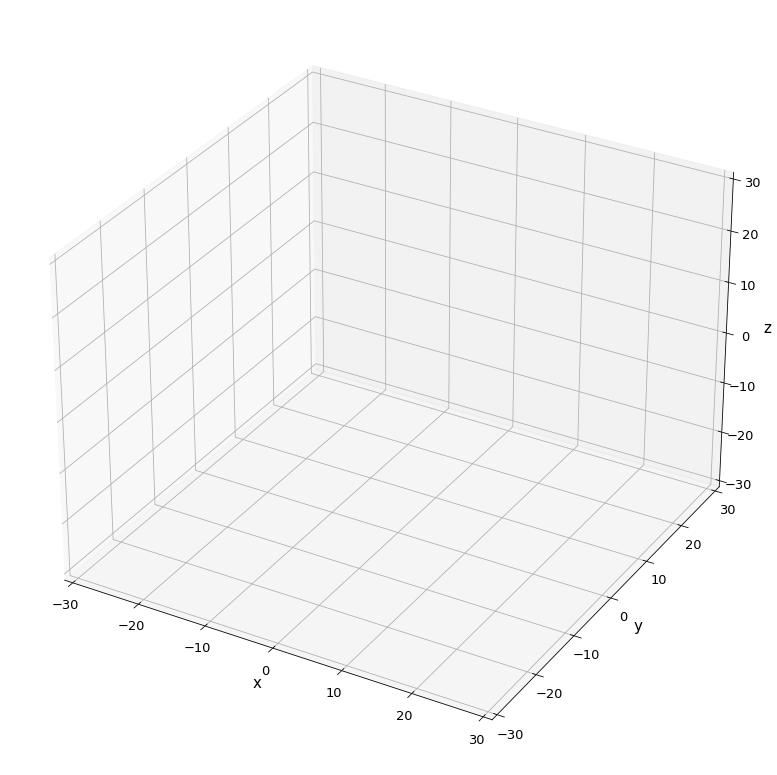

In [ ]:
f_anim_extpot_nob = np.arange(0, 11, 1)


fig_anim_extpot_nob = plt.figure(figsize=(14,14)) 
ax_anim = fig_anim_extpot_nob.add_subplot(projection = '3d')

scatter1_extpot_nob = ax_anim_extpot_nob.scatter([], [], [], c='b', s=20, alpha=0.5)


#anim_color3d = mpl.colors.Normalize(vmin=0, vmax=1200)
#anim_cmap3d = mpl.cm.ScalarMappable(norm=anim_color3d, cmap=mpl.cm.plasma)


def init_anim_extpot_nob():
    
    #scatter1.set_color(anim_cmap3d.to_rgba(np.arange(0, 1200, 1)))
    
    ax_anim_extpot_nob.set_xlabel('x')
    ax_anim_extpot_nob.set_ylabel('y')
    ax_anim_extpot_nob.set_zlabel('z') 
    
    ax_anim_extpot_nob.set_xlim(xmin=-30, xmax=30)
    ax_anim_extpot_nob.set_ylim(ymin=-30, ymax=30)
    ax_anim_extpot_nob.set_zlim(zmin=-30, zmax=30)
    
    plt.show()
    
    return scatter1, 

def update_anim_extpot_nob(frame):
    scatter1._offsets3d = (positions[:, 0, frame], positions[:, 1, frame], positions[:, 2, frame])
    
    #scatter_data_p1 = np.hstack((x1200_p1[:, frame, np.newaxis], y1200_p1[:, frame, np.newaxis], 
     #                         z1200_p1[:, frame, np.newaxis]))
    #scatter1.set_offsets(scatter_data_p1)  
    
    return scatter1, 



animation_plots = animation.FuncAnimation(fig_anim_extpot_nob, update_anim_extpot_nob, 
                                                    frames=f_anim_extpot_nob, init_func=init_anim_extpot_nob)

writervideo = animation.PillowWriter(fps=2)
animation_plots_extpot_nob.save('Anim_test_large_cluster.gif', writer=writervideo)

# Mcluster input test, 20,000 particles, 10steps, external potential

In [27]:
mcluster_test1 = extract_data(r'data', r'Trialrun_mcluster_test', 10, 1)

print(np.shape(mcluster_test1))

(20000, 19, 11)


In [29]:
print(np.min(mcluster_test1[:, 1, 0]))
print(np.max(mcluster_test1[:, 1, 0]))

print(np.min(mcluster_test1[:, 1, 10]))
print(np.max(mcluster_test1[:, 1, 10]))

-36.2881508777731
33.4542696133298
-35.49984465102645
35.94224015124144


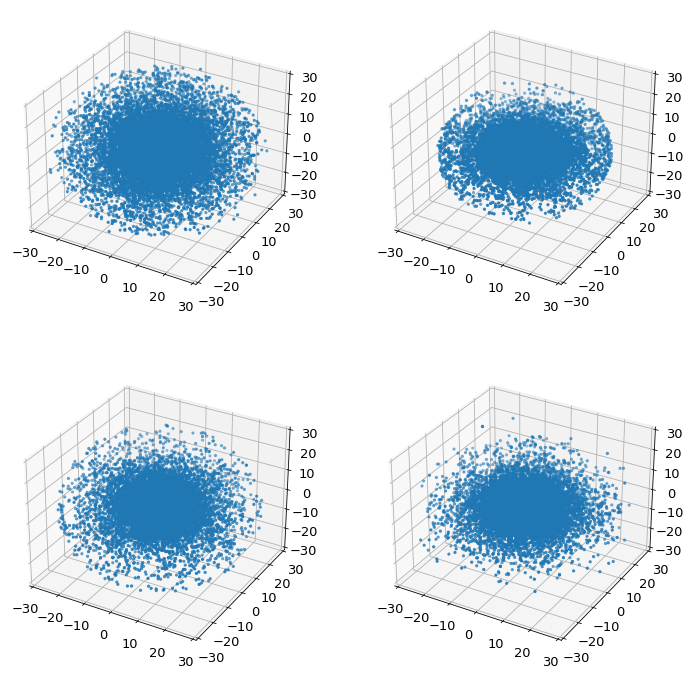

In [30]:
fig5 = plt.figure(figsize=(12,12))


ax0_mcluster = fig5.add_subplot(221, projection='3d')
ax0_mcluster.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax0_mcluster.scatter3D(mcluster_test1[:, 1, 0], mcluster_test1[:, 2, 0], mcluster_test1[:, 3, 0], s=5)

ax3_mcluster = fig5.add_subplot(222, projection='3d')
ax3_mcluster.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax3_mcluster.scatter3D(mcluster_test1[:, 1, 3], mcluster_test1[:, 2, 3], mcluster_test1[:, 3, 3], s=5)


ax7_mcluster = fig5.add_subplot(223, projection='3d')
ax7_mcluster.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax7_mcluster.scatter3D(mcluster_test1[:, 1, 7], mcluster_test1[:, 2, 7], mcluster_test1[:, 3, 7], s=5)

ax10_mcluster = fig5.add_subplot(224, projection='3d')
ax10_mcluster.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax10_mcluster.scatter3D(mcluster_test1[:, 1, 10], mcluster_test1[:, 2, 10], mcluster_test1[:, 3, 10], s=5)

plt.show()

### Animation:

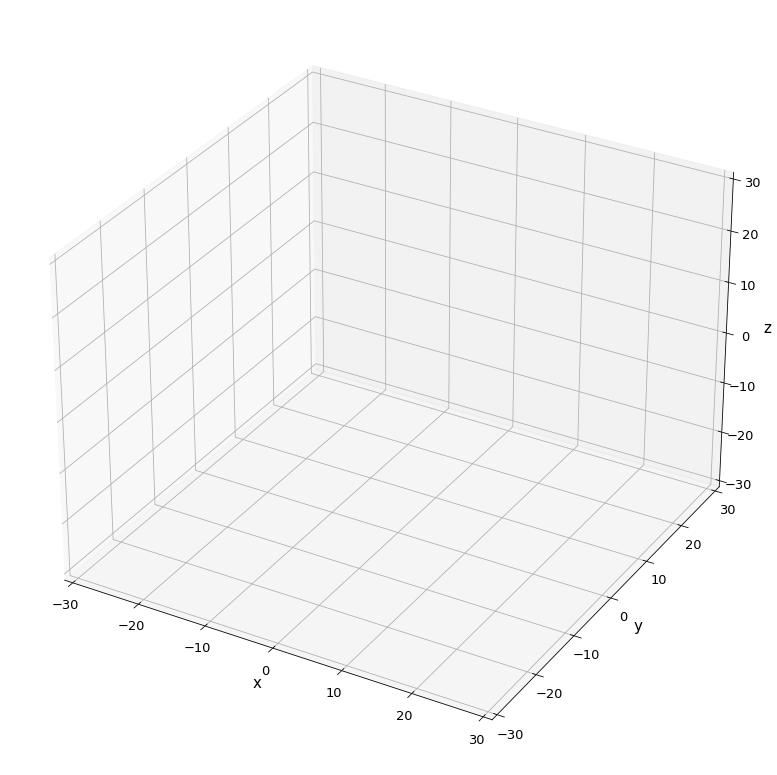

In [48]:
f_anim_mcluster = np.arange(0, 11, 1)


fig_anim_mcluster = plt.figure(figsize=(14,14)) 
ax_anim_mcluster = fig_anim_mcluster.add_subplot(projection = '3d')

scatter1 = ax_anim_mcluster.scatter([], [], [], c='b', s=20, alpha=0.5)

anim_color3d = mpl.colors.Normalize(vmin=0, vmax=20000)
anim_cmap3d = mpl.cm.ScalarMappable(norm=anim_color3d, cmap=mpl.cm.cool)



def init_anim_mcluster(): 
    scatter1.set_color(anim_cmap3d.to_rgba(np.arange(0, 20000, 1)))
    
    ax_anim_mcluster.set_xlabel('x')
    ax_anim_mcluster.set_ylabel('y')
    ax_anim_mcluster.set_zlabel('z') 
    
    ax_anim_mcluster.set_xlim(xmin=-30, xmax=30)
    ax_anim_mcluster.set_ylim(ymin=-30, ymax=30)
    ax_anim_mcluster.set_zlim(zmin=-30, zmax=30)
    
    plt.show()
    
    return scatter1, 

def update_anim_mcluster(frame):
    scatter1._offsets3d = (mcluster_test1[:, 1, frame], mcluster_test1[:, 2, frame], mcluster_test1[:, 3, frame])
    
    scatter_data = np.hstack((mcluster_test1[:, :, frame], mcluster_test1[:, :, frame], 
                              mcluster_test1[:, :, frame]))
    scatter1.set_offsets(scatter_data) 
    
    return scatter1, 



animation_plots_mcluster = animation.FuncAnimation(fig_anim_mcluster, update_anim_mcluster, 
                                                    frames=f_anim_mcluster, init_func=init_anim_mcluster)

writervideo = animation.PillowWriter(fps=2)
animation_plots_mcluster.save('Anim_test_mcluster_cluster.gif', writer=writervideo)

## 5000 particles, massive potential

In [31]:
massive_pot = extract_data(r'mcluster_massive_potential_test_data', r'Trialrun_5000part_massive_pot', 10, 1)

print(np.shape(massive_pot))

(5000, 19, 11)


In [32]:
print(np.min(massive_pot[:, 1, 0]))
print(np.max(massive_pot[:, 1, 0]))

print(np.min(massive_pot[:, 1, 10]))
print(np.max(massive_pot[:, 1, 10]))

-23.0405340028442
22.9366058135811
-23.110594421185844
23.28305837248149


In [40]:
print(mcluster_test1[:, 16, :])
print()
print(massive_pot[:, 16, :])

[[-196027.23064199 -196311.67804012 -197590.30176974 ... -196972.04329947
  -199375.88797442 -200800.04918336]
 [-196053.21142151 -196328.49960299 -197619.86977795 ... -196989.9176363
  -199400.72151178 -200850.67998476]
 [-191766.57267    -192662.89611758 -197853.3629855  ... -192438.88430326
  -191779.98778664 -192962.59736895]
 ...
 [-189183.51380531 -189974.67183205 -193574.71692517 ... -193377.43210475
  -189907.340773   -189184.46587721]
 [-189615.43479786 -190014.58150259 -191424.29874697 ... -190037.59951467
  -191461.93253264 -195349.86445496]
 [-189169.77423804 -189958.22001225 -193688.21027171 ... -192695.74556258
  -189721.10421649 -189188.56462686]]

[[ 3831.11106432 -9976.90267301  3833.35616849 ...  3825.55443284
  -1159.11318336  3805.35508157]
 [ 3827.52488689 -9978.4766056   3830.31071523 ...  3823.09509185
  -1165.51291382  3800.70569933]
 [ 2056.37459664  1683.14786489 -1898.70396555 ...  1717.64295955
   2036.53503932  1384.46936314]
 ...
 [ 4508.5273108   4016.628

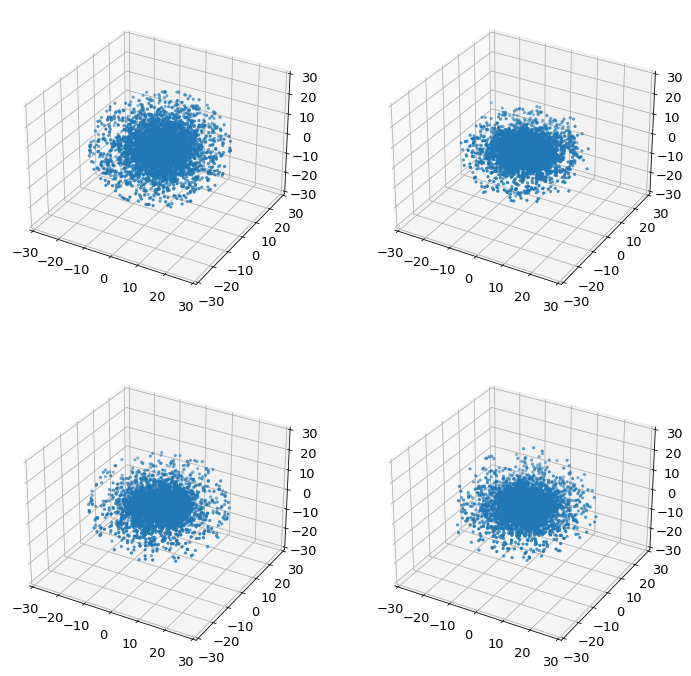

In [33]:
fig6 = plt.figure(figsize=(12,12))


ax0_massive_pot = fig6.add_subplot(221, projection='3d')
ax0_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax0_massive_pot.scatter3D(massive_pot[:, 1, 0], massive_pot[:, 2, 0], massive_pot[:, 3, 0], s=5)

ax3_massive_pot = fig6.add_subplot(222, projection='3d')
ax3_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax3_massive_pot.scatter3D(massive_pot[:, 1, 3], massive_pot[:, 2, 3], massive_pot[:, 3, 3], s=5)


ax7_massive_pot = fig6.add_subplot(223, projection='3d')
ax7_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax7_massive_pot.scatter3D(massive_pot[:, 1, 7], massive_pot[:, 2, 7], massive_pot[:, 3, 7], s=5)

ax10_massive_pot = fig6.add_subplot(224, projection='3d')
ax10_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax10_massive_pot.scatter3D(massive_pot[:, 1, 10], massive_pot[:, 2, 10], massive_pot[:, 3, 10], s=5)

plt.show()

### Animation:

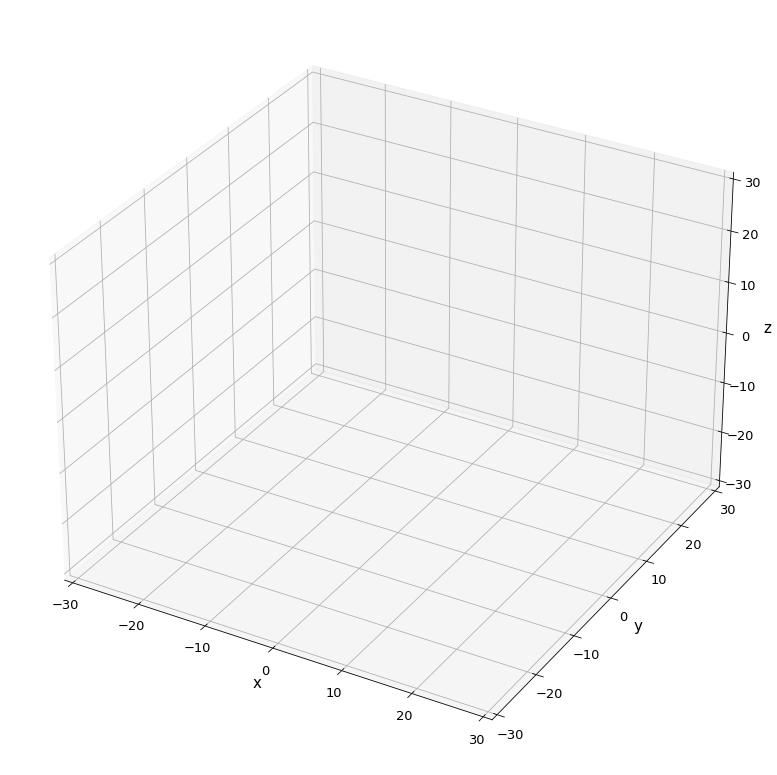

In [35]:
f_anim_massive_pot = np.arange(0, 11, 1)


fig_anim_massive_pot = plt.figure(figsize=(14,14)) 
ax_anim_massive_pot = fig_anim_massive_pot.add_subplot(projection = '3d')

scatter1 = ax_anim_massive_pot.scatter([], [], [], c='b', s=20, alpha=0.5)

anim_color3d = mpl.colors.Normalize(vmin=0, vmax=5000)
anim_cmap3d = mpl.cm.ScalarMappable(norm=anim_color3d, cmap=mpl.cm.cool)



def init_anim_massive_pot(): 
    scatter1.set_color(anim_cmap3d.to_rgba(np.arange(0, 5000, 1)))
    
    ax_anim_massive_pot.set_xlabel('x')
    ax_anim_massive_pot.set_ylabel('y')
    ax_anim_massive_pot.set_zlabel('z') 
    
    ax_anim_massive_pot.set_xlim(xmin=-30, xmax=30)
    ax_anim_massive_pot.set_ylim(ymin=-30, ymax=30)
    ax_anim_massive_pot.set_zlim(zmin=-30, zmax=30)
    
    plt.show()
    
    return scatter1, 

def update_anim_massive_pot(frame):
    scatter1._offsets3d = (massive_pot[:, 1, frame], massive_pot[:, 2, frame], massive_pot[:, 3, frame])
    
    scatter_data = np.hstack((massive_pot[:, :, frame], massive_pot[:, :, frame], 
                              massive_pot[:, :, frame]))
    scatter1.set_offsets(scatter_data) 
    
    return scatter1, 



animation_plots_massive_pot = animation.FuncAnimation(fig_anim_massive_pot, update_anim_massive_pot, 
                                                    frames=f_anim_massive_pot, init_func=init_anim_massive_pot)

writervideo = animation.PillowWriter(fps=2)
animation_plots_massive_pot.save('Anim_test_massive_pot_cluster.gif', writer=writervideo)

# 1000 particles, 200 timesteps, above disc

In [61]:
run_above_disc_data, run_above_disc_header, run_above_disc_extra, above_disc_hist_data = extract_data(r'mcluster_above_disc_data', 
                                                          r'Trialrun_1000part_above_disc', 13, 1)

print(run_above_disc_data.shape)
print(run_above_disc_extra.shape)
print(run_above_disc_header.shape)

above_disc_halfmass_r = run_above_disc_extra[0, :]
print(above_disc_halfmass_r)

print(run_above_disc_header[1, :])


v_mean_above_disc = np.sqrt(run_above_disc_header[-3, :]**2 + run_above_disc_header[-2, :]**2 + run_above_disc_header[-1, :]**2)

print(v_mean_above_disc.shape)

Number of particles is conserved: True
(1000, 21, 14)
(9, 14)
(8, 14)
[10.          6.979997    6.36969838  6.14906175  7.16936289  7.32632412
  9.00649874  6.38747763  5.87452073  7.8474765   7.6755017   6.20170515
  7.35990228  7.23169726]
[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40. 44. 48. 52.]
(14,)


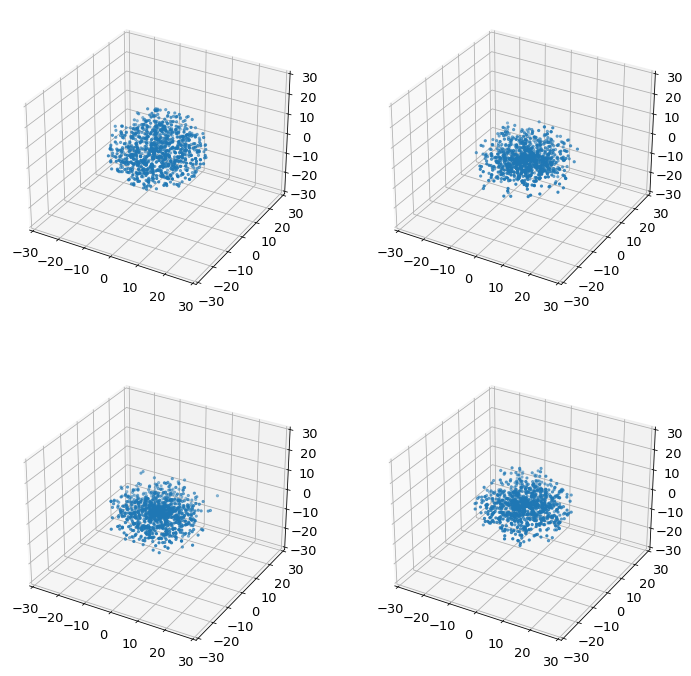

In [4]:
fig7 = plt.figure(figsize=(12,12))


ax0_massive_pot = fig7.add_subplot(221, projection='3d')
ax0_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax0_massive_pot.scatter3D(run_above_disc_data[:, 1, 0], run_above_disc_data[:, 2, 0], run_above_disc_data[:, 3, 0], s=5)

ax3_massive_pot = fig7.add_subplot(222, projection='3d')
ax3_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax3_massive_pot.scatter3D(run_above_disc_data[:, 1, 5], run_above_disc_data[:, 2, 5], run_above_disc_data[:, 3, 5], s=5)


ax3_massive_pot = fig7.add_subplot(223, projection='3d')
ax3_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax3_massive_pot.scatter3D(run_above_disc_data[:, 1, 10], run_above_disc_data[:, 2, 10], run_above_disc_data[:, 3, 10], s=5)

ax4_massive_pot = fig7.add_subplot(224, projection='3d')
ax4_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax4_massive_pot.scatter3D(run_above_disc_data[:, 1, 13], run_above_disc_data[:, 2, 13], run_above_disc_data[:, 3, 13], s=5)

plt.show()

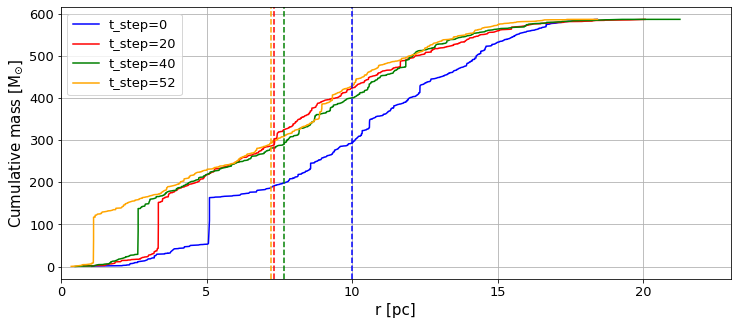

In [5]:
cumfig1, cumax1 = plt.subplots(figsize=(12, 5))

cumax1.plot(above_disc_hist_data[1, :, 0], above_disc_hist_data[0, :, 0], c='b', label='t_step=0')
cumax1.plot(above_disc_hist_data[1, :, 5], above_disc_hist_data[0, :, 5], c='r', label='t_step=20')
cumax1.plot(above_disc_hist_data[1, :, 10], above_disc_hist_data[0, :, 10], c='g', label='t_step=40')
cumax1.plot(above_disc_hist_data[1, :, 13], above_disc_hist_data[0, :, 13], c='orange', label='t_step=52')

cumax1.axvline(above_disc_halfmass_r[0], color='b', linestyle='dashed')
cumax1.axvline(above_disc_halfmass_r[5], color='r', linestyle='dashed')
cumax1.axvline(above_disc_halfmass_r[10], color='g', linestyle='dashed')
cumax1.axvline(above_disc_halfmass_r[13], color='orange', linestyle='dashed')

cumax1.set_xlim(xmin=0, xmax=23)

cumax1.set_xlabel('r [pc]')
cumax1.set_ylabel(r'Cumulative mass [M$_{\odot}$]')
cumax1.legend()

plt.show()

### V_mean vs time

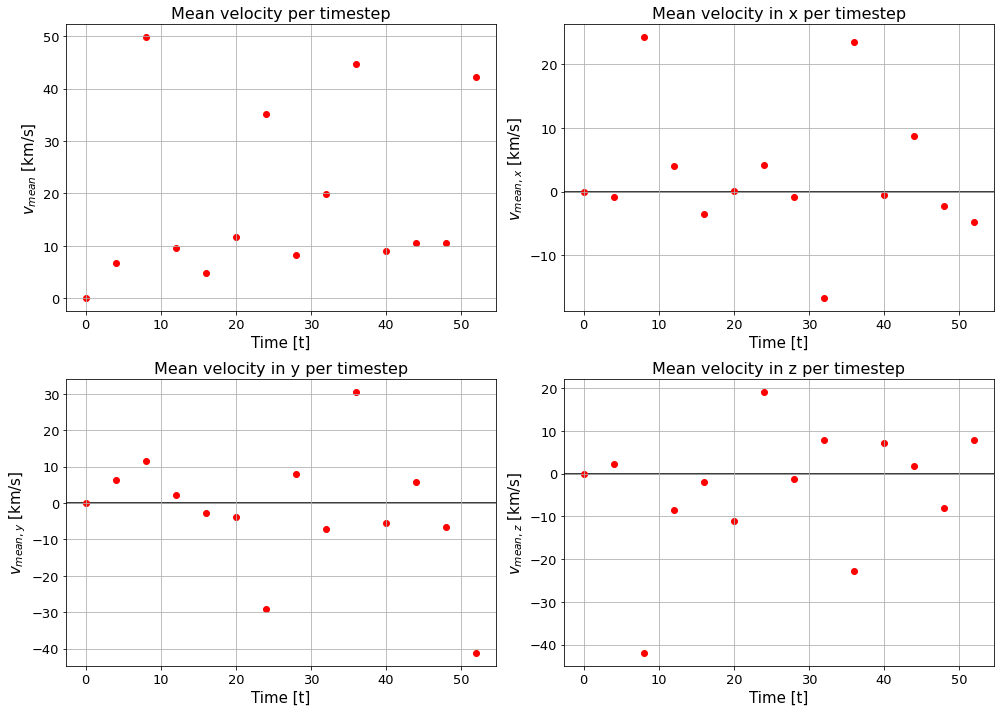

In [62]:
figad, axad = plt.subplots(2, 2, figsize=(14, 10))

axad[0,0].scatter(run_above_disc_header[1, :], v_mean_above_disc, color='r')

axad[0,0].set_xlabel('Time [t]')
axad[0,0].set_ylabel(r'$v_{mean}$ [km/s]')
axad[0,0].set_title('Mean velocity per timestep')



axad[0,1].scatter(run_above_disc_header[1, :], run_above_disc_header[-3, :], color='r')

axad[0,1].set_xlabel('Time [t]')
axad[0,1].set_ylabel(r'$v_{mean, x}$ [km/s]')
axad[0,1].set_title('Mean velocity in x per timestep')
axad[0,1].axhline(0, color='k', zorder=0)


axad[1,0].scatter(run_above_disc_header[1, :], run_above_disc_header[-2, :], color='r')

axad[1,0].set_xlabel('Time [t]')
axad[1,0].set_ylabel(r'$v_{mean, y}$ [km/s]')
axad[1,0].set_title('Mean velocity in y per timestep')
axad[1,0].axhline(0, color='k', zorder=0)



axad[1,1].scatter(run_above_disc_header[1, :], run_above_disc_header[-1, :], color='r')

axad[1,1].set_xlabel('Time [t]')
axad[1,1].set_ylabel(r'$v_{mean, z}$ [km/s]')
axad[1,1].set_title('Mean velocity in z per timestep')
axad[1,1].axhline(0, color='k', zorder=0)

plt.tight_layout()
plt.show()

# 1000 particles, 200 timesteps, at centre

In [63]:
run_at_centre_data, run_at_centre_header, run_at_centre_extra, at_centre_hist_data = extract_data(r'mcluster_at_centre_data', r'Trialrun_1000part_at_centre', 50, 1)

print(run_at_centre_data.shape)
print(run_at_centre_extra.shape)

at_centre_halfmass_r = run_at_centre_extra[0, :]
print(at_centre_halfmass_r)

print(np.max(at_centre_halfmass_r))
print(np.min(at_centre_halfmass_r))

v_mean_at_centre = np.sqrt(run_at_centre_header[-3, :]**2 + run_at_centre_header[-2, :]**2 + run_at_centre_header[-1, :]**2)

print(v_mean_at_centre.shape)

Number of particles is conserved: True
(1000, 21, 51)
(9, 51)
[10.          7.32739497  5.56995274  7.33020693  8.34127978  7.62898313
  6.27035208  6.00115391  7.12915292  8.51476     7.65189576  5.79338789
  6.79095723  7.74263362  8.00124618  7.52500981  6.07028628  6.02473429
  7.21279845  7.29818819  8.26558723  8.54702887  7.397051    6.31180079
  5.4447862   6.30632601  6.78988988  8.22046307  8.33670042  7.77488196
  6.56959559  6.18206534  6.48882593  7.89188097  7.42976433  6.4989541
  8.01742348  8.46212142  8.56110769  8.13535289  7.45363815  6.6597211
  5.60380159  5.88059739  5.77824887  7.16962599  8.05284199  8.33212664
  8.33604142  7.47347617  5.98278432]
9.999999999999996
5.444786201332221
(51,)


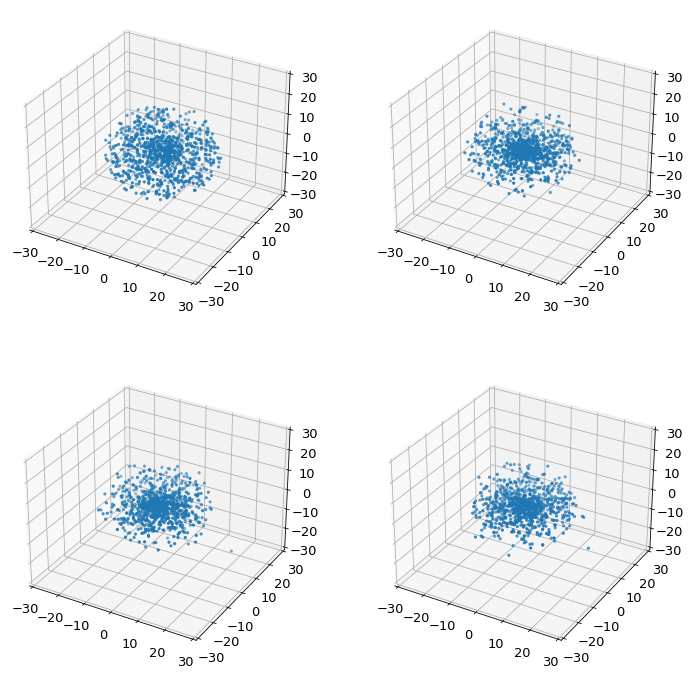

In [20]:
fig8 = plt.figure(figsize=(12,12))


ax0_massive_pot = fig8.add_subplot(221, projection='3d')
ax0_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax0_massive_pot.scatter3D(run_at_centre_data[:, 1, 0], run_at_centre_data[:, 2, 0], run_at_centre_data[:, 3, 0], s=5)

ax3_massive_pot = fig8.add_subplot(222, projection='3d')
ax3_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax3_massive_pot.scatter3D(run_at_centre_data[:, 1, 15], run_at_centre_data[:, 2, 15], run_at_centre_data[:, 3, 15], s=5)


ax7_massive_pot = fig8.add_subplot(223, projection='3d')
ax7_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax7_massive_pot.scatter3D(run_at_centre_data[:, 1, 30], run_at_centre_data[:, 2, 30], run_at_centre_data[:, 3, 30], s=5)

ax10_massive_pot = fig8.add_subplot(224, projection='3d')
ax10_massive_pot.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax10_massive_pot.scatter3D(run_at_centre_data[:, 1, 50], run_at_centre_data[:, 2, 50], run_at_centre_data[:, 3, 50], s=5)

plt.show()

### Plotting cumulative mass distributions for 4 different timesteps for the cluster at the centre

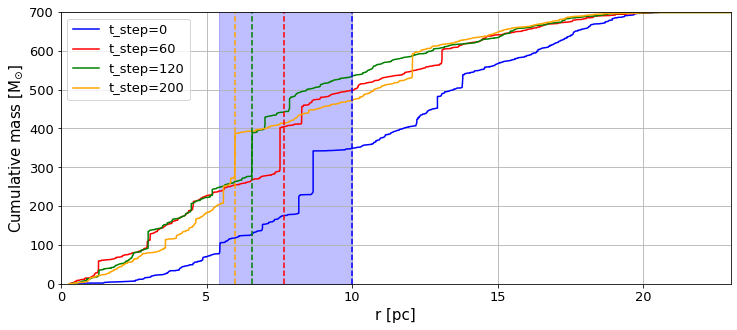

In [21]:
cumfig2, cumax2 = plt.subplots(figsize=(12, 5))

cumax2.plot(at_centre_hist_data[1, :, 0], at_centre_hist_data[0, :, 0], c='b', label='t_step=0')
cumax2.plot(at_centre_hist_data[1, :, 15], at_centre_hist_data[0, :, 15], c='r', label='t_step=60')
cumax2.plot(at_centre_hist_data[1, :, 30], at_centre_hist_data[0, :, 30], c='g', label='t_step=120')
cumax2.plot(at_centre_hist_data[1, :, 50], at_centre_hist_data[0, :, 50], c='orange', label='t_step=200')

cumax2.fill_betweenx(y=np.array([0, 700]), x1=np.min(at_centre_halfmass_r), x2=np.max(at_centre_halfmass_r), 
                     color='b', alpha=0.25)

cumax2.axvline(at_centre_halfmass_r[0], color='b', linestyle='dashed')
cumax2.axvline(at_centre_halfmass_r[10], color='r', linestyle='dashed')
cumax2.axvline(at_centre_halfmass_r[30], color='g', linestyle='dashed')
cumax2.axvline(at_centre_halfmass_r[50], color='orange', linestyle='dashed')

cumax2.set_xlim(xmin=0, xmax=23)
cumax2.set_ylim(ymin=0, ymax=700)

cumax2.set_xlabel('r [pc]')
cumax2.set_ylabel(r'Cumulative mass [M$_{\odot}$]')
cumax2.legend()

plt.show()

### Plotting mean velocities

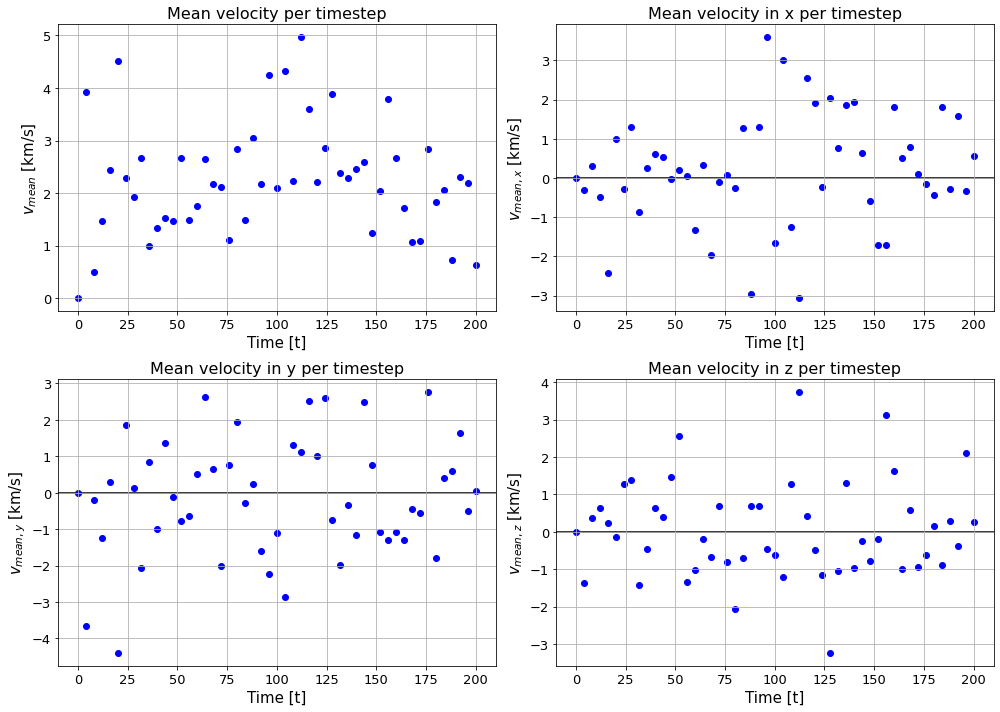

In [64]:
figac2, axac2 = plt.subplots(2, 2, figsize=(14, 10))

axac2[0,0].scatter(run_at_centre_header[1, :], v_mean_at_centre, color='b')

axac2[0,0].set_xlabel('Time [t]')
axac2[0,0].set_ylabel(r'$v_{mean}$ [km/s]')
axac2[0,0].set_title('Mean velocity per timestep')



axac2[0,1].scatter(run_at_centre_header[1, :], run_at_centre_header[-3, :], color='b')

axac2[0,1].set_xlabel('Time [t]')
axac2[0,1].set_ylabel(r'$v_{mean, x}$ [km/s]')
axac2[0,1].set_title('Mean velocity in x per timestep')
axac2[0,1].axhline(0, color='k', zorder=0)


axac2[1,0].scatter(run_at_centre_header[1, :], run_at_centre_header[-2, :], color='b')

axac2[1,0].set_xlabel('Time [t]')
axac2[1,0].set_ylabel(r'$v_{mean, y}$ [km/s]')
axac2[1,0].set_title('Mean velocity in y per timestep')
axac2[1,0].axhline(0, color='k', zorder=0)



axac2[1,1].scatter(run_at_centre_header[1, :], run_at_centre_header[-1, :], color='b')

axac2[1,1].set_xlabel('Time [t]')
axac2[1,1].set_ylabel(r'$v_{mean, z}$ [km/s]')
axac2[1,1].set_title('Mean velocity in z per timestep')
axac2[1,1].axhline(0, color='k', zorder=0)

plt.tight_layout()
plt.show()

### Plotting comparison of cumulative mass distributions and half-mass radii for the two clusters

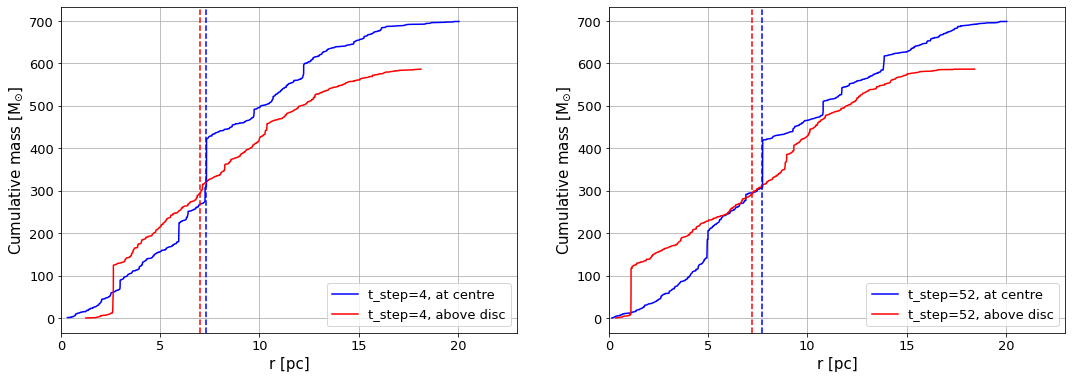

In [23]:
cumfig3, cumax3 = plt.subplots(1, 2, figsize=(18, 6))

cumax3[0].plot(at_centre_hist_data[1, :, 1], at_centre_hist_data[0, :, 1], c='b', label='t_step=4, at centre')
cumax3[0].plot(above_disc_hist_data[1, :, 1], above_disc_hist_data[0, :, 1], c='r', label='t_step=4, above disc')
cumax3[0].axvline(at_centre_halfmass_r[1], color='b', linestyle='dashed')
cumax3[0].axvline(above_disc_halfmass_r[1], color='r', linestyle='dashed')
cumax3[0].set_xlim(xmin=0, xmax=23)

cumax3[0].set_xlabel('r [pc]')
cumax3[0].set_ylabel(r'Cumulative mass [M$_{\odot}$]')
cumax3[0].legend()


cumax3[1].plot(at_centre_hist_data[1, :, 13], at_centre_hist_data[0, :, 13], c='b', label='t_step=52, at centre')
cumax3[1].plot(above_disc_hist_data[1, :, 13], above_disc_hist_data[0, :, 13], c='r', label='t_step=52, above disc')
cumax3[1].axvline(at_centre_halfmass_r[13], color='b', linestyle='dashed')
cumax3[1].axvline(above_disc_halfmass_r[13], color='r', linestyle='dashed')
cumax3[1].set_xlim(xmin=0, xmax=23)

cumax3[1].set_xlabel('r [pc]')
cumax3[1].set_ylabel(r'Cumulative mass [M$_{\odot}$]')
cumax3[1].legend()

plt.show()

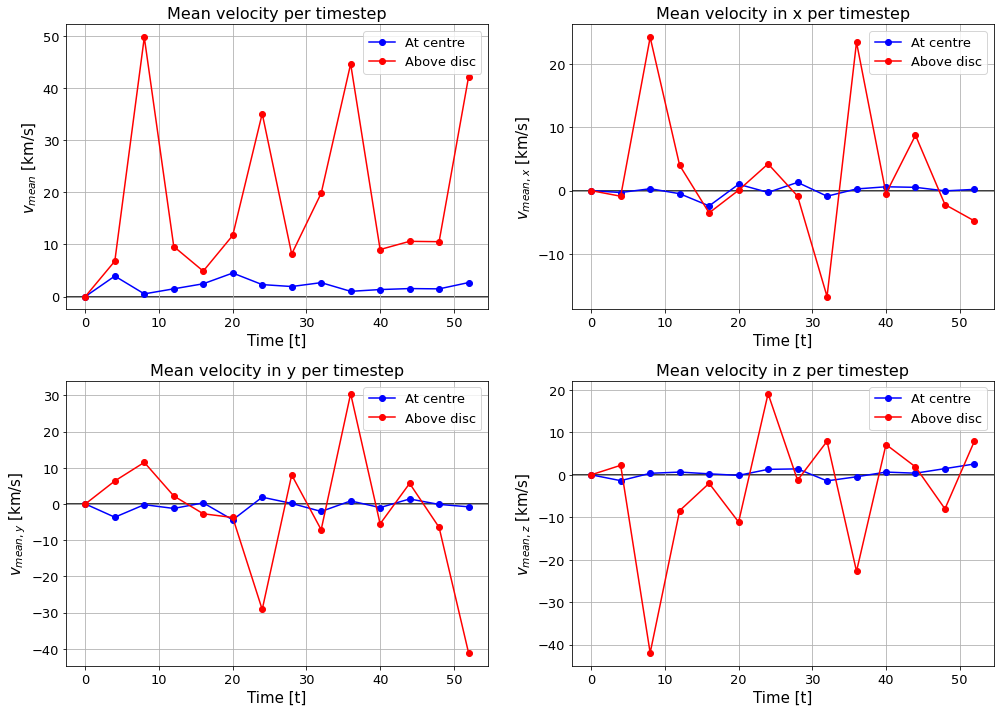

In [74]:
figboth, axboth = plt.subplots(2, 2, figsize=(14, 10))

axboth[0,0].plot(run_at_centre_header[1, :14], v_mean_at_centre[:14], color='b', label='At centre', marker='o')
axboth[0,0].plot(run_above_disc_header[1, :], v_mean_above_disc, color='r', label='Above disc', marker='o')

axboth[0,0].set_xlabel('Time [t]')
axboth[0,0].set_ylabel(r'$v_{mean}$ [km/s]')
axboth[0,0].set_title('Mean velocity per timestep')
axboth[0,0].axhline(0, color='k', zorder=0)
axboth[0,0].legend()



axboth[0,1].plot(run_at_centre_header[1, :14], run_at_centre_header[-3, :14], color='b', label='At centre', marker='o')
axboth[0,1].plot(run_above_disc_header[1, :], run_above_disc_header[-3, :], color='r', label='Above disc', marker='o')

axboth[0,1].set_xlabel('Time [t]')
axboth[0,1].set_ylabel(r'$v_{mean, x}$ [km/s]')
axboth[0,1].set_title('Mean velocity in x per timestep')
axboth[0,1].axhline(0, color='k', zorder=0)
axboth[0,1].legend()


axboth[1,0].plot(run_at_centre_header[1, :14], run_at_centre_header[-2, :14], color='b', label='At centre', marker='o')
axboth[1,0].plot(run_above_disc_header[1, :], run_above_disc_header[-2, :], color='r', label='Above disc', marker='o')

axboth[1,0].set_xlabel('Time [t]')
axboth[1,0].set_ylabel(r'$v_{mean, y}$ [km/s]')
axboth[1,0].set_title('Mean velocity in y per timestep')
axboth[1,0].axhline(0, color='k', zorder=0)
axboth[1,0].legend()



axboth[1,1].plot(run_at_centre_header[1, :14], run_at_centre_header[-1, :14], color='b', label='At centre', marker='o')
axboth[1,1].plot(run_above_disc_header[1, :], run_above_disc_header[-1, :], color='r', label='Above disc', marker='o')

axboth[1,1].set_xlabel('Time [t]')
axboth[1,1].set_ylabel(r'$v_{mean, z}$ [km/s]')
axboth[1,1].set_title('Mean velocity in z per timestep')
axboth[1,1].axhline(0, color='k', zorder=0)
axboth[1,1].legend()

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.25)
#plt.savefig('Mean_velocities_comparison.png', facecolor='w')
plt.show()

## Animations

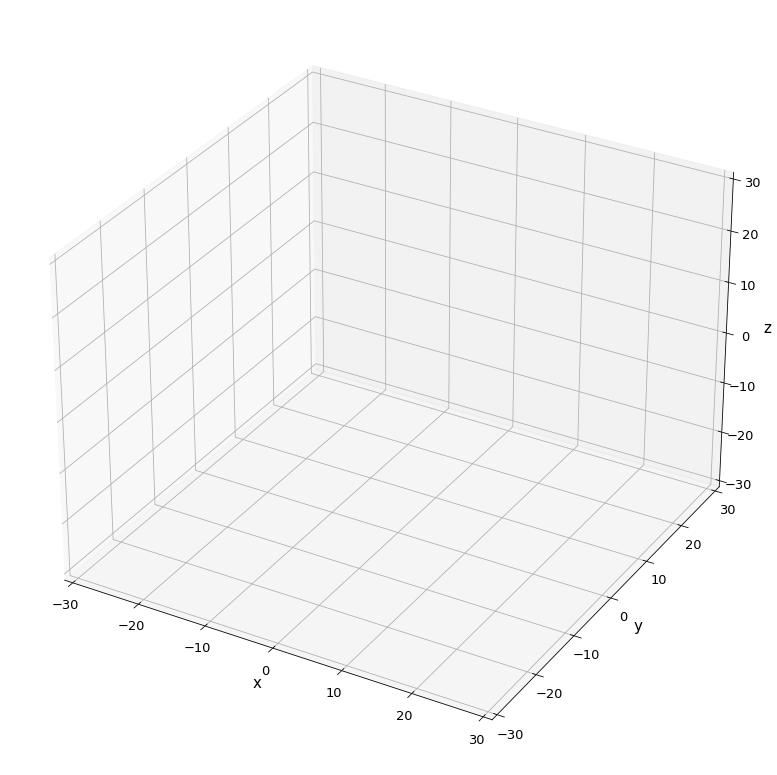

In [23]:
f_anim_at_centre = np.arange(0, 19, 1)


fig_anim_at_centre = plt.figure(figsize=(14,14)) 
ax_anim_at_centre = fig_anim_at_centre.add_subplot(projection = '3d')

scatter1 = ax_anim_at_centre.scatter([], [], [], c='b', s=20, alpha=0.5)

anim_color3d = mpl.colors.Normalize(vmin=0, vmax=1000)
anim_cmap3d = mpl.cm.ScalarMappable(norm=anim_color3d, cmap=mpl.cm.cool)



def init_anim_at_centre(): 
    scatter1.set_color(anim_cmap3d.to_rgba(np.arange(0, 1000, 1)))
    
    ax_anim_at_centre.set_xlabel('x')
    ax_anim_at_centre.set_ylabel('y')
    ax_anim_at_centre.set_zlabel('z') 
    
    ax_anim_at_centre.set_xlim(xmin=-30, xmax=30)
    ax_anim_at_centre.set_ylim(ymin=-30, ymax=30)
    ax_anim_at_centre.set_zlim(zmin=-30, zmax=30)
    
    plt.show()
    
    return scatter1, 

def update_anim_at_centre(frame):
    scatter1._offsets3d = (run_at_centre_data[:, 1, frame], run_at_centre_data[:, 2, frame], run_at_centre_data[:, 3, frame])
    
    scatter_data = np.hstack((run_at_centre_data[:, :, frame], run_at_centre_data[:, :, frame], 
                              run_at_centre_data[:, :, frame]))
    scatter1.set_offsets(scatter_data) 
    
    return scatter1, 



animation_plots_at_centre = animation.FuncAnimation(fig_anim_at_centre, update_anim_at_centre, 
                                                    frames=f_anim_at_centre, init_func=init_anim_at_centre)

writervideo = animation.PillowWriter(fps=2)
animation_plots_at_centre.save('Anim_test_at_centre_cluster.gif', writer=writervideo)

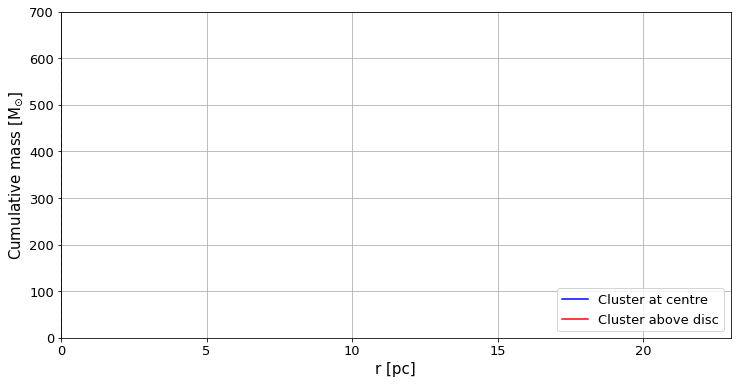

In [89]:
f_anim_cumdists = np.arange(0, 14, 1)

fig_anim_cumdists, ax_anim_cumdists = plt.subplots(figsize=(12, 6))

x1, y1, x2, y2 = [], [], [], []

plot1, = ax_anim_cumdists.plot([], [], color='b', label='Cluster at centre')
plot2, = ax_anim_cumdists.plot([], [], color='r', label='Cluster above disc')

lines = [plot1, plot2]

vline1 = ax_anim_cumdists.axvline(0, color='b', linestyle='dashed')
vline2 = ax_anim_cumdists.axvline(0, color='r', linestyle='dashed')

my_text = ax_anim_cumdists.text(0.5, 650, '', fontsize=20)

def init_anim_cumdists():
    
    ax_anim_cumdists.set_xlabel('r [pc]')
    ax_anim_cumdists.set_ylabel(r'Cumulative mass [M$_{\odot}$]')
    ax_anim_cumdists.legend(loc = 'lower right')
    
    ax_anim_cumdists.set_xlim(xmin=0, xmax=23)
    ax_anim_cumdists.set_ylim(ymin=0, ymax=700)
    
    plt.show()
    
    return lines

def update_anim_cumdists(frame):
    my_text.set_text(f't = {frame*4}')
    
    lines[0].set_data(at_centre_hist_data[1, :, frame], at_centre_hist_data[0, :, frame])
    lines[1].set_data(above_disc_hist_data[1, :, frame], above_disc_hist_data[0, :, frame])
    
    vline1.set_xdata(run_at_centre_extra[0, frame])
    vline2.set_xdata(run_above_disc_extra[0, frame])
    
    return lines, vline1, vline2



animation_plots_cumdists = animation.FuncAnimation(fig_anim_cumdists, update_anim_cumdists, 
                                                    frames=f_anim_cumdists, init_func=init_anim_cumdists)

writervideo = animation.PillowWriter(fps=2)
animation_plots_cumdists.save('Anim_test_cumdists.gif', writer=writervideo)

### Animation of mass cumsum evolution

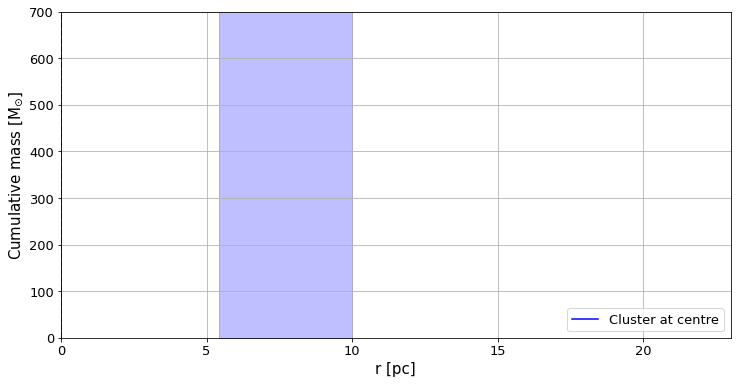

In [99]:
f_anim_cumdist_at_centre = np.arange(0, 51, 1)

fig_anim_cumdist_at_centre, ax_anim_cumdist_at_centre = plt.subplots(figsize=(12, 6))

plot1, = ax_anim_cumdist_at_centre.plot([], [], color='b', label='Cluster at centre')

vline1 = ax_anim_cumdist_at_centre.axvline(0, color='b', linestyle='dashed')

my_text = ax_anim_cumdist_at_centre.text(0.5, 650, '', fontsize=20)

def init_anim_cumdist_at_centre():
    
    ax_anim_cumdist_at_centre.set_xlabel('r [pc]')
    ax_anim_cumdist_at_centre.set_ylabel(r'Cumulative mass [M$_{\odot}$]')
    ax_anim_cumdist_at_centre.legend(loc = 'lower right')
    
    ax_anim_cumdist_at_centre.set_xlim(xmin=0, xmax=23)
    ax_anim_cumdist_at_centre.set_ylim(ymin=0, ymax=700)
    
    ax_anim_cumdist_at_centre.fill_betweenx(y=np.array([0, 700]), x1=np.min(at_centre_halfmass_r), 
                                             x2=np.max(at_centre_halfmass_r), color='b', alpha=0.25)
    
    plt.show()
    
    return plot1

def update_anim_cumdist_at_centre(frame):
    my_text.set_text(f't = {frame*4} Myr')
    
    plot1.set_data(at_centre_hist_data[1, :, frame], at_centre_hist_data[0, :, frame])
    
    vline1.set_xdata(run_at_centre_extra[0, frame])
    
    return plot1, vline1



animation_plots_cumdist_at_centre = animation.FuncAnimation(fig_anim_cumdist_at_centre, update_anim_cumdist_at_centre, 
                                                    frames=f_anim_cumdist_at_centre, init_func=init_anim_cumdist_at_centre)

writervideo = animation.PillowWriter(fps=5)
animation_plots_cumdist_at_centre.save('Anim_test_cumdist_at_centre.gif', writer=writervideo)

# 5 particles at different places in the galaxy

In [69]:
five_part_data, five_part_header, five_part_extra, fuve_part_hist_data = extract_data(r'number_of_particles_test_data', r'Trialrun_5part', 50, 1)

print(five_part_data.shape)
print(five_part_extra.shape)

fuve_part_halfmass_r = five_part_extra[0, :]
print(fuve_part_halfmass_r)

print(np.max(fuve_part_halfmass_r))
print(np.min(fuve_part_halfmass_r))

Number of particles is conserved: True
(5, 21, 51)
(4, 51)
[10000.         10133.43590896 10133.71575981 10133.99561066
 10134.27546151 10134.55531235 10134.8351632  10135.11501405
 10135.3948649  10135.67471575 10135.9545666  10136.23441745
 10136.5142683  10136.79411915 10137.07397    10137.35382085
 10137.6336717  10137.91352255 10138.19337339 10138.47322424
 10138.75307509 10139.03292594 10139.31277679 10139.59262764
 10139.87247849 10140.15232934 10140.43218019 10140.71203104
 10140.99188189 10141.27173274 10141.55158358 10141.83143443
 10142.11128528 10142.39113613 10142.67098698 10142.95083783
 10143.23068868 10143.51053953 10143.79039038 10144.07024123
 10144.35009208 10144.62994292 10144.90979377 10145.18964462
 10145.46949547 10145.74934632 10146.02919717 10146.30904802
 10146.58889887 10146.86874972 10147.14860057]
10147.148600567249
10000.0


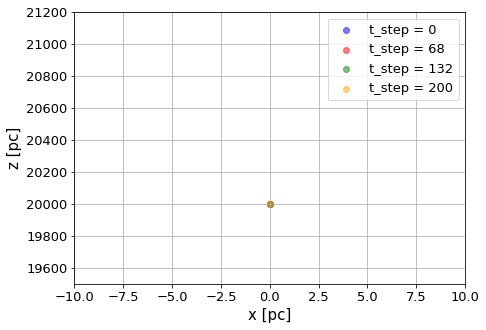

In [72]:
fig5part, ax5part = plt.subplots(figsize=(7, 5))

ax5part.scatter(five_part_data[:, 1, 0], five_part_data[:, 3, 0], color='b', label=f't_step = {0*4}', alpha=0.5)
ax5part.scatter(five_part_data[:, 1, 17], five_part_data[:, 3, 17], color='r', label=f't_step = {17*4}', alpha=0.5)
ax5part.scatter(five_part_data[:, 1, 33], five_part_data[:, 3, 33], color='g', label=f't_step = {33*4}', alpha=0.5)
ax5part.scatter(five_part_data[:, 1, 50], five_part_data[:, 3, 50], color='orange', label=f't_step = {50*4}', alpha=0.5)

ax5part.legend()
ax5part.set_xlabel('x [pc]')
ax5part.set_ylabel('z [pc]')
ax5part.set_xlim(xmin=-10, xmax=10)
ax5part.set_ylim(ymax=21200, ymin=19500)

plt.show()

# 1000 particles, 1000 timesteps, basic test run

In [15]:
run_basic_data, run_basic_header, run_basic_extra, basic_hist_data = extract_data(r'data', r'Basic_test_run', 31, 1)

print(run_basic_data.shape)
print(run_basic_extra.shape)

basic_halfmass_r = run_basic_extra[0, :]
print(basic_halfmass_r)

print(np.max(basic_halfmass_r))
print(np.min(basic_halfmass_r))

v_mean_basic, r_mean_basic = means_calc(run_basic_header)

print(v_mean_basic.shape)

Number of particles is conserved: True
(1000, 21, 32)
(4, 32)
[  0.80000066   1.77935972   4.13348392   7.62994257   7.44628017
   8.72844435  12.40577517  15.24204047  30.41195247  50.71286167
  69.87768358  86.29938978 103.92641608 117.45853751 138.30555047
 155.76150652 177.33678528 191.39223004 212.87811749 240.64691338
 257.16339484 267.51833893 279.22170068 295.0278837  298.39761626
 345.36636841 366.17956191 368.2524902  384.25452162 410.56817485
 426.76301263 452.95266231]
452.9526623123493
0.8000006584132072
(32,)


### Plotting mean velocities

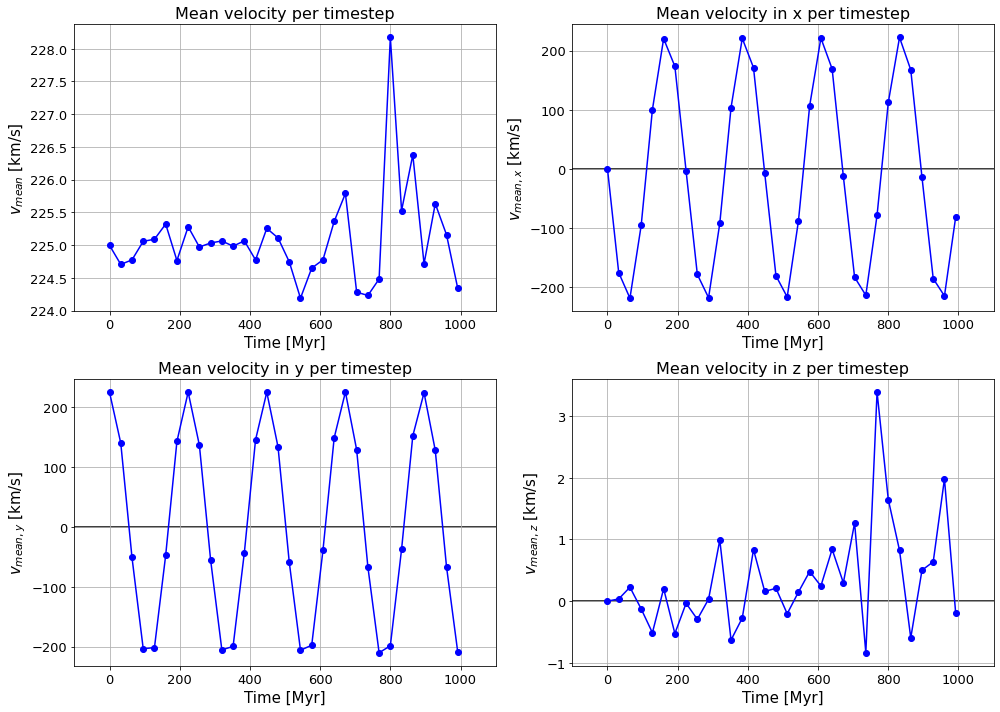

In [16]:
means_plots(which='vel', header_array=run_basic_header, mean=v_mean_basic, t_max=1000, 
            fig_width=14, fig_height=10)

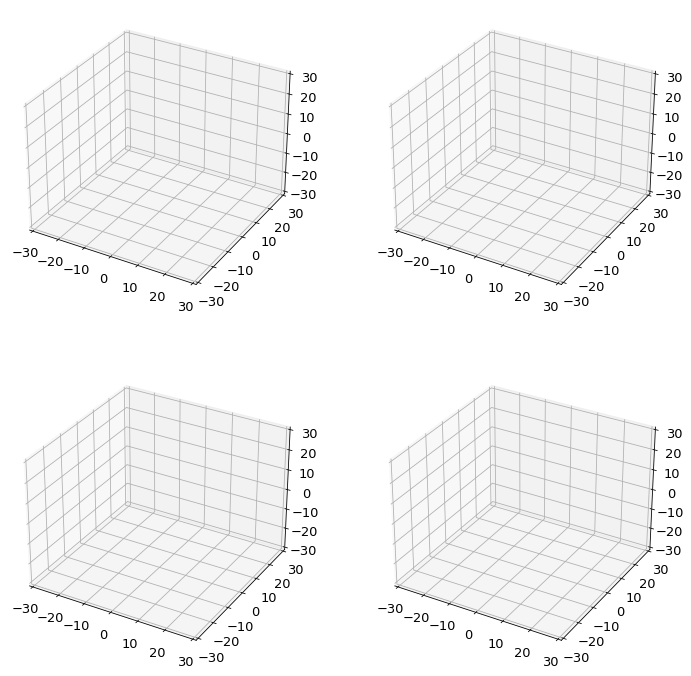

In [17]:
fig15 = plt.figure(figsize=(12,12))


ax0_basic = fig15.add_subplot(221, projection='3d')
ax0_basic.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax0_basic.scatter3D(run_basic_data[:, 1, 0], run_basic_data[:, 2, 0], run_basic_data[:, 3, 0], s=5)

ax3_basic = fig15.add_subplot(222, projection='3d')
ax3_basic.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax3_basic.scatter3D(run_basic_data[:, 1, 10], run_basic_data[:, 2, 10], run_basic_data[:, 3, 10], s=5)


ax7_basic = fig15.add_subplot(223, projection='3d')
ax7_basic.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax7_basic.scatter3D(run_basic_data[:, 1, 20], run_basic_data[:, 2, 20], run_basic_data[:, 3, 20], s=5)

ax10_basic = fig15.add_subplot(224, projection='3d')
ax10_basic.set(xlim=(-30, 30), ylim=(-30, 30), zlim=(-30, 30))
ax10_basic.scatter3D(run_basic_data[:, 1, 31], run_basic_data[:, 2, 31], run_basic_data[:, 3, 31], s=5)

plt.show()

# 1000 particles, 1Gyr, z-test

In [10]:
run_z_test_data, run_z_test_header, run_z_test_extra, z_test_hist_data = extract_data(r'data', r'Trialrun_z_test_basic', 31, 1)

print(run_z_test_data.shape)
print(run_z_test_extra.shape)

z_test_halfmass_r = run_z_test_extra[0, :]
print(z_test_halfmass_r)

print(np.max(z_test_halfmass_r))
print(np.min(z_test_halfmass_r))

v_mean_z_test, r_mean_z_test = means_calc(run_z_test_header)

print(v_mean_z_test.shape)
print(r_mean_z_test.shape)

Number of particles is conserved: True
(1000, 21, 32)
(4, 32)
[8.00215115e-01 2.01402225e+00 3.47760212e+00 8.68672971e+00
 9.34797994e+00 1.79313772e+02 3.15781040e+02 3.67725964e+02
 4.03755892e+02 1.22462607e+03 7.86283682e+02 2.61358773e+03
 2.49540175e+02 6.10448615e+02 3.92128427e+03 1.16951604e+04
 1.32222287e+04 6.13680517e+03 5.47254969e+03 4.28861028e+03
 1.00079011e+03 5.63470212e+03 1.38588961e+04 1.19899131e+04
 4.69849078e+03 5.63034990e+03 1.23522547e+04 8.87283495e+03
 1.40075374e+03 3.94381919e+03 8.07705261e+03 1.82503441e+04]
18250.344058487808
0.8002151147936369
(32,)
(32,)


### Plotting mean velocities

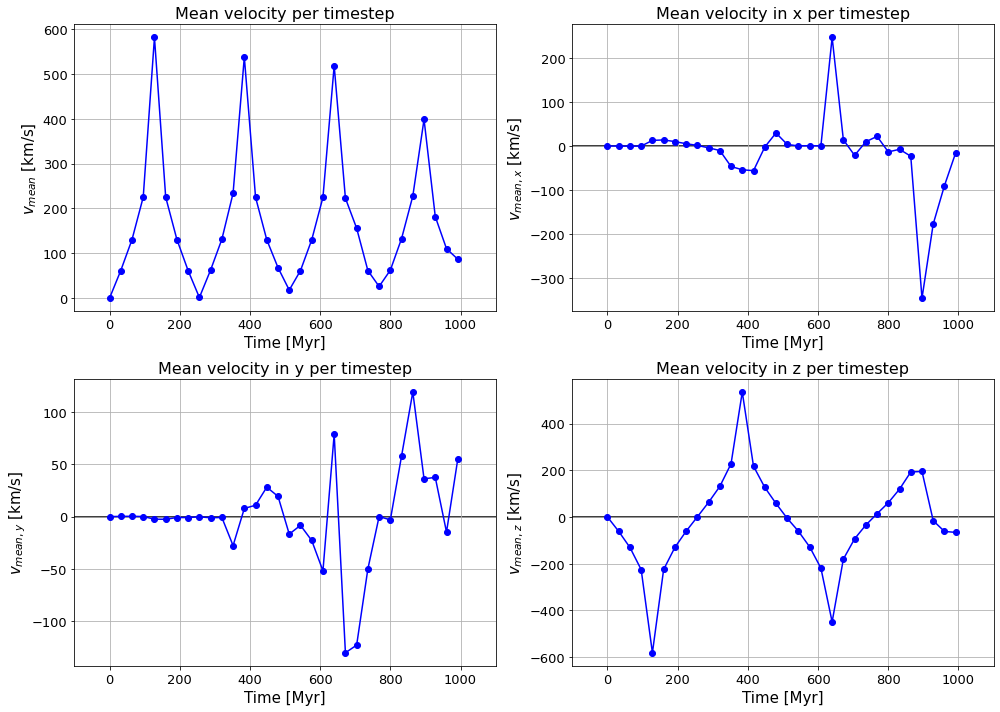

In [13]:
means_plots(which='vel', header_array=run_z_test_header, mean=v_mean_z_test, t_max=1000, run='z_drop', 
            fig_width=14, fig_height=10)

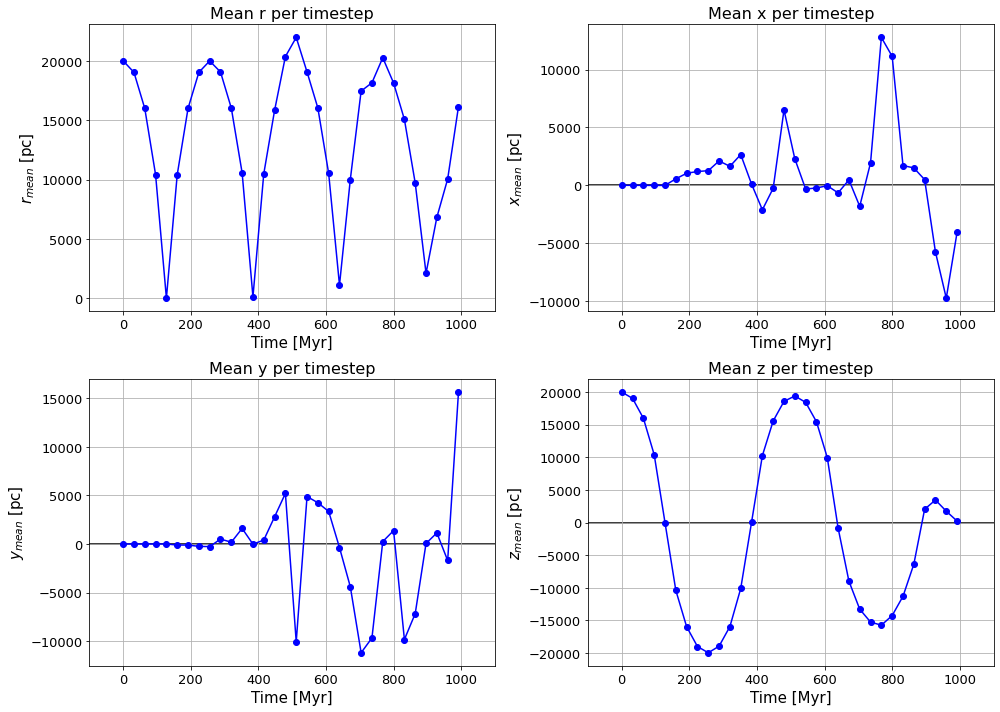

In [14]:
means_plots(which='pos', header_array=run_z_test_header, mean=r_mean_z_test, t_max=1000, run='z_drop', 
            fig_width=14, fig_height=10)

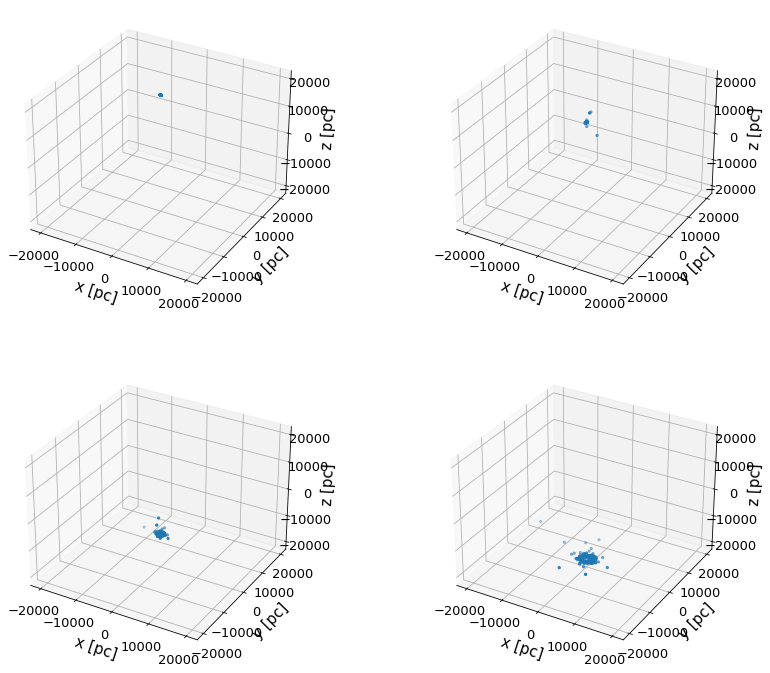

In [15]:
fig16 = plt.figure(figsize=(14,12))

limits = 22000

ax0_z_test = fig16.add_subplot(221, projection='3d')
ax0_z_test.set(xlim=(-limits, limits), ylim=(-limits, limits), zlim=(-limits, limits))
ax0_z_test.scatter3D(run_z_test_data[:, 1, 0], run_z_test_data[:, 2, 0], run_z_test_data[:, 3, 0], s=5)
ax0_z_test.set_xlabel('x [pc]')
ax0_z_test.set_ylabel('y [pc]')
ax0_z_test.set_zlabel('z [pc]')

ax3_z_test = fig16.add_subplot(222, projection='3d')
ax3_z_test.set(xlim=(-limits, limits), ylim=(-limits, limits), zlim=(-limits, limits))
ax3_z_test.scatter3D(run_z_test_data[:, 1, 3], run_z_test_data[:, 2, 3], run_z_test_data[:, 3, 3], s=5)
ax3_z_test.set_xlabel('x [pc]')
ax3_z_test.set_ylabel('y [pc]')
ax3_z_test.set_zlabel('z [pc]')


ax7_z_test = fig16.add_subplot(223, projection='3d')
ax7_z_test.set(xlim=(-limits, limits), ylim=(-limits, limits), zlim=(-limits, limits))
ax7_z_test.scatter3D(run_z_test_data[:, 1, 5], run_z_test_data[:, 2, 5], run_z_test_data[:, 3, 5], s=5)
ax7_z_test.set_xlabel('x [pc]')
ax7_z_test.set_ylabel('y [pc]')
ax7_z_test.set_zlabel('z [pc]')

ax10_z_test = fig16.add_subplot(224, projection='3d')
ax10_z_test.set(xlim=(-limits, limits), ylim=(-limits, limits), zlim=(-limits, limits))
ax10_z_test.scatter3D(run_z_test_data[:, 1, 8], run_z_test_data[:, 2, 8], run_z_test_data[:, 3, 8], s=5)
ax10_z_test.set_xlabel('x [pc]')
ax10_z_test.set_ylabel('y [pc]')
ax10_z_test.set_zlabel('z [pc]')

plt.show()

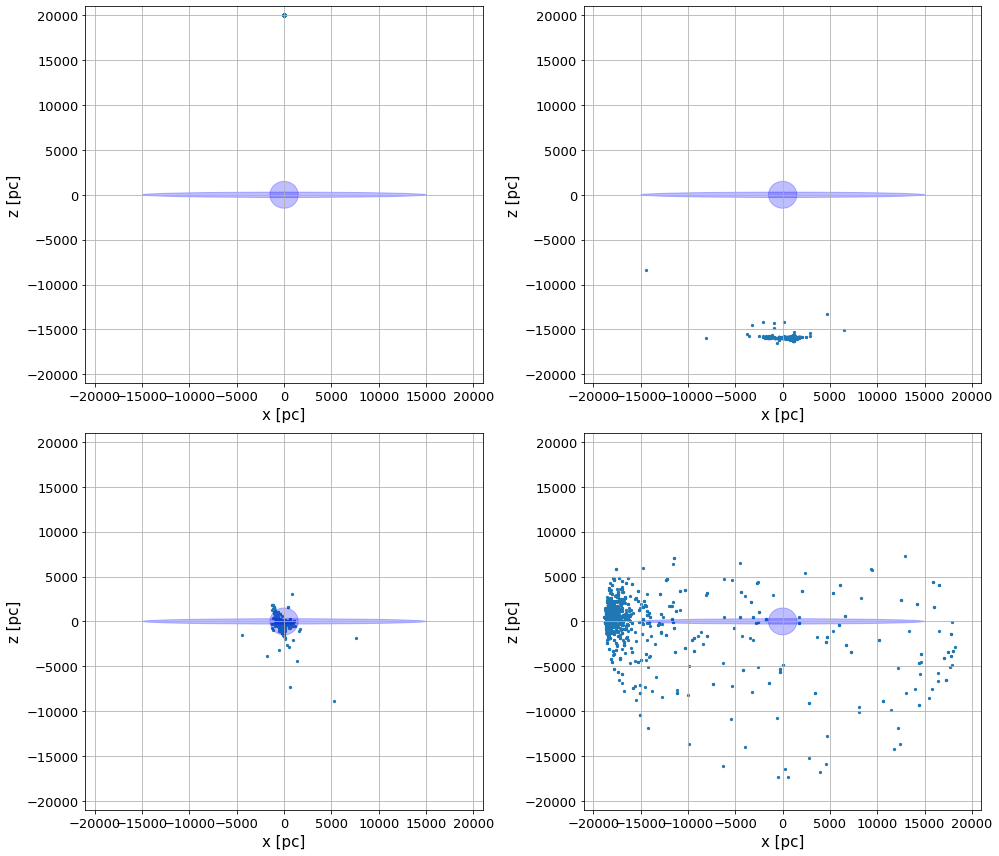

In [20]:
fig17, ax17 = plt.subplots(2, 2, figsize=(14,12))

xlimits = 21000
ylimits = 21000

ellipse1 = mpl.patches.Ellipse((0, 0), width=30000, height=600, color='b', alpha=0.25)
circle1 = mpl.patches.Circle((0, 0), 1500, color='b', alpha=0.25)

ax17[0, 0].scatter(run_z_test_data[:, 1, 0], run_z_test_data[:, 3, 0], s=5)
ax17[0, 0].set_xlabel('x [pc]')
ax17[0, 0].set_ylabel('z [pc]')
ax17[0, 0].set_xlim(xmin=-xlimits, xmax=xlimits)
ax17[0, 0].set_ylim(ymin=-ylimits, ymax=ylimits)
ax17[0, 0].add_patch(circle1)
ax17[0, 0].add_patch(ellipse1)


ellipse2 = mpl.patches.Ellipse((0, 0), width=30000, height=600, color='b', alpha=0.25)
circle2 = mpl.patches.Circle((0, 0), 1500, color='b', alpha=0.25)

ax17[0, 1].scatter(run_z_test_data[:, 1, 10], run_z_test_data[:, 3, 10], s=5)
ax17[0, 1].set_xlabel('x [pc]')
ax17[0, 1].set_ylabel('z [pc]')
ax17[0, 1].set_xlim(xmin=-xlimits, xmax=xlimits)
ax17[0, 1].set_ylim(ymin=-ylimits, ymax=ylimits)
ax17[0, 1].add_patch(circle2)
ax17[0, 1].add_patch(ellipse2)

ellipse3 = mpl.patches.Ellipse((0, 0), width=30000, height=600, color='b', alpha=0.25)
circle3 = mpl.patches.Circle((0, 0), 1500, color='b', alpha=0.25)

ax17[1, 0].scatter(run_z_test_data[:, 1, 20], run_z_test_data[:, 3, 20], s=5)
ax17[1, 0].set_xlabel('x [pc]')
ax17[1, 0].set_ylabel('z [pc]')
ax17[1, 0].set_xlim(xmin=-xlimits, xmax=xlimits)
ax17[1, 0].set_ylim(ymin=-ylimits, ymax=ylimits)
ax17[1, 0].add_patch(circle3)
ax17[1, 0].add_patch(ellipse3)

ellipse4 = mpl.patches.Ellipse((0, 0), width=30000, height=600, color='b', alpha=0.25)
circle4 = mpl.patches.Circle((0, 0), 1500, color='b', alpha=0.25)

ax17[1, 1].scatter(run_z_test_data[:, 1, 31], run_z_test_data[:, 3, 31], s=5)
ax17[1, 1].set_xlabel('x [pc]')
ax17[1, 1].set_ylabel('z [pc]')
ax17[1, 1].set_xlim(xmin=-xlimits, xmax=xlimits)
ax17[1, 1].set_ylim(ymin=-ylimits, ymax=ylimits)
ax17[1, 1].add_patch(circle4)
ax17[1, 1].add_patch(ellipse4)

plt.tight_layout()
plt.show()

### Aniimations

In [21]:
print(run_z_test_data[:, 1, 31].shape)

(1000,)


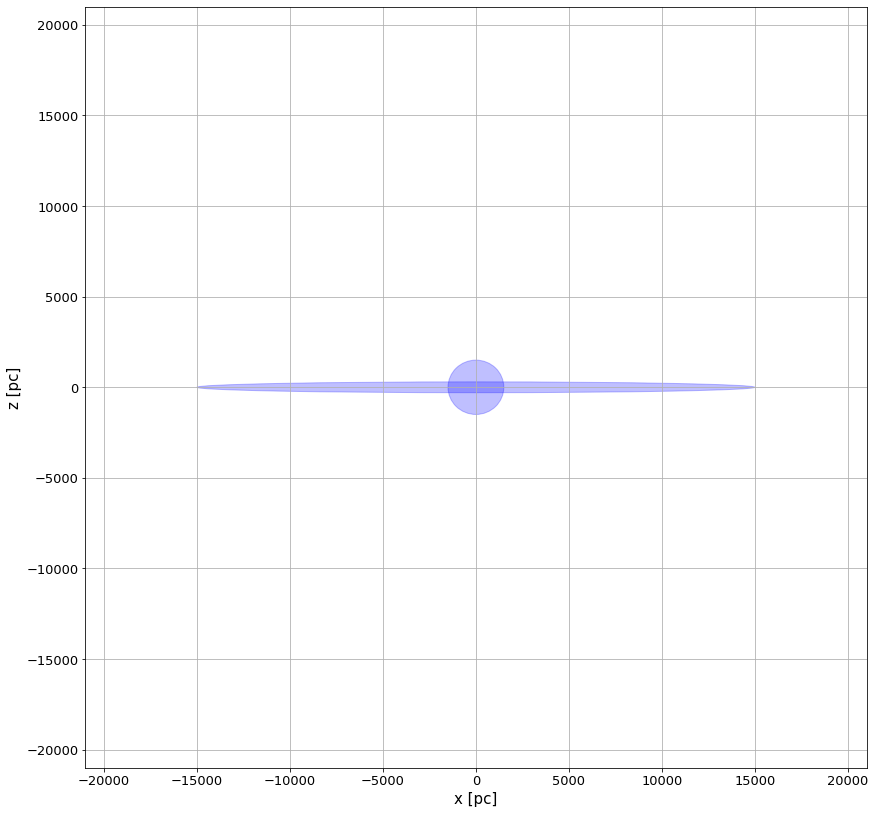

In [32]:
f_anim_ztest = np.arange(0, 31, 1)


fig_anim_ztest, ax_anim_ztest = plt.subplots(figsize=(14,14)) 
# = fig_anim_at_centre.add_subplot(projection = '3d')

scatter1, = ax_anim_ztest.plot([], [], c='b', marker='.', linestyle=' ') #s=20,

ellipse = mpl.patches.Ellipse((0, 0), width=30000, height=600, color='b', alpha=0.25)
circle = mpl.patches.Circle((0, 0), 1500, color='b', alpha=0.25)

data = [scatter1]

#anim_color3d = mpl.colors.Normalize(vmin=0, vmax=1000)
#anim_cmap3d = mpl.cm.ScalarMappable(norm=anim_color3d, cmap=mpl.cm.cool)

my_text = ax_anim_ztest.text(-19900, 19100, '', fontsize=20)

def init_anim_ztest(): 
    #scatter1.set_color(anim_cmap3d.to_rgba(np.arange(0, 1000, 1)))
    #data[0].set_offsets([], [])
    
    ax_anim_ztest.set_xlabel('x [pc]')
    ax_anim_ztest.set_ylabel('z [pc]')
    #ax_anim_at_centre.set_zlabel('z') 
    
    ax_anim_ztest.set_xlim(xmin=-21000, xmax=21000)
    ax_anim_ztest.set_ylim(ymin=-21000, ymax=21000)
    #ax_anim_at_centre.set_zlim(zmin=-30, zmax=30)
    
    ax_anim_ztest.add_patch(circle)
    ax_anim_ztest.add_patch(ellipse)
    
    plt.show()
    
    return data, 

def update_anim_ztest(frame):
    my_text.set_text(f't={frame*32}')
    #scatter1._offsets3d = (run_at_centre_data[:, 1, frame], run_at_centre_data[:, 2, frame], run_at_centre_data[:, 3, frame])
    
    #scatter_data = np.hstack((run_at_centre_data[:, :, frame], run_at_centre_data[:, :, frame], 
                              #run_at_centre_data[:, :, frame]))
    #scatter1.set_offsets(scatter_data) 
    data[0].set_data(np.array([run_z_test_data[:, 1, frame], run_z_test_data[:, 3, frame]]))
    
    return data, 



animation_plots_ztest = animation.FuncAnimation(fig_anim_ztest, update_anim_ztest, 
                                                    frames=f_anim_ztest, init_func=init_anim_ztest)

writervideo = animation.FFMpegWriter(fps=6) #PillowWriter(fps=6)
animation_plots_ztest.save('Anim_test_ztest_cluster.mp4', writer=writervideo)

# 1000 particles, 1Gyr, Petar test 1

In [4]:
run_petar_test1_data, run_petar_test1_header, run_petar_test1_extra, petar_test1_hist_data = extract_data(r'petar_test6', r'Petar_test6', 31, 1)

print(run_petar_test1_data.shape)
print(run_petar_test1_extra.shape)
print(run_petar_test1_header.shape)

petar_test1_halfmass_r = run_petar_test1_extra[0, :]
print(petar_test1_halfmass_r)

print(np.max(petar_test1_halfmass_r))
print(np.min(petar_test1_halfmass_r))

v_mean_petar_test1, r_mean_petar_test1 = means_calc(run_petar_test1_header)

print(v_mean_petar_test1.shape)
print(r_mean_petar_test1.shape)

Number of particles is conserved: True
(1000, 21, 32)
(4, 32)
(8, 32)
[  0.79999992   2.069572     3.5994314   17.04772232  27.00823776
  22.5149844   25.49682956  35.02975299  44.54820495  56.91674803
  69.0403505   85.9713841  109.28652999 139.35138784 172.25931481
 121.55305331  81.77433408  56.02409307  60.62832464  87.51911091
 117.03978083 161.09916902 235.63490415 386.06300315 211.52450733
 134.90150286  84.8536905   72.83465954 110.33044379 171.51144923
 237.76363476 356.03659983]
386.06300315392497
0.7999999229588824
(32,)
(32,)


### Plotting mean velocities

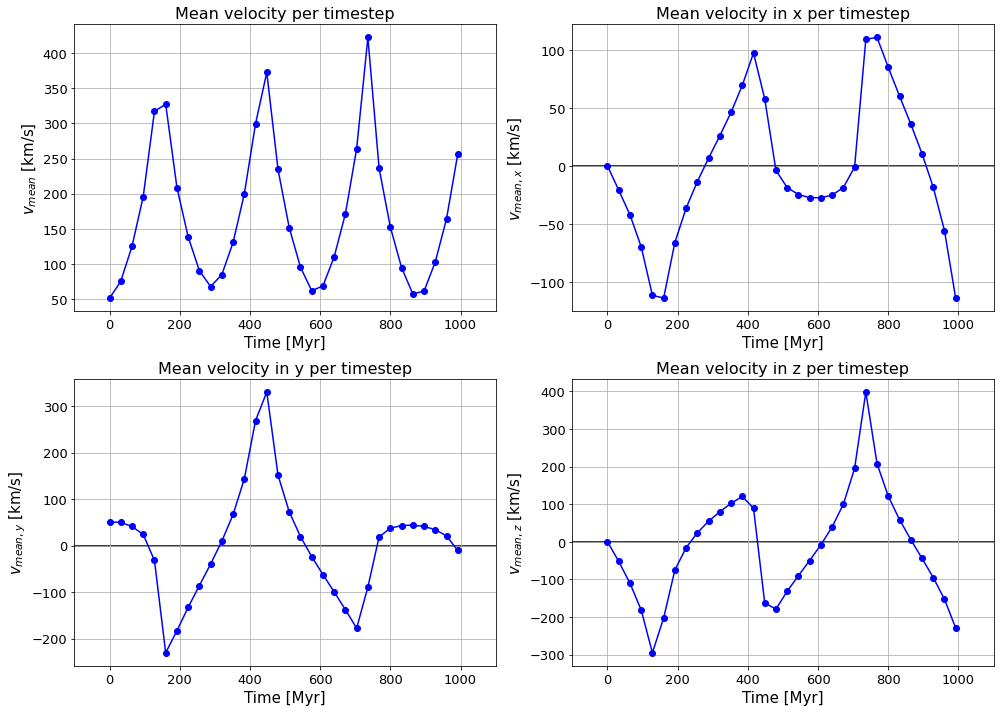

In [5]:
means_plots(which='vel', header_array=run_petar_test1_header, mean=v_mean_petar_test1, t_max=1000, run='ptest6', 
            fig_width=14, fig_height=10, save=True)

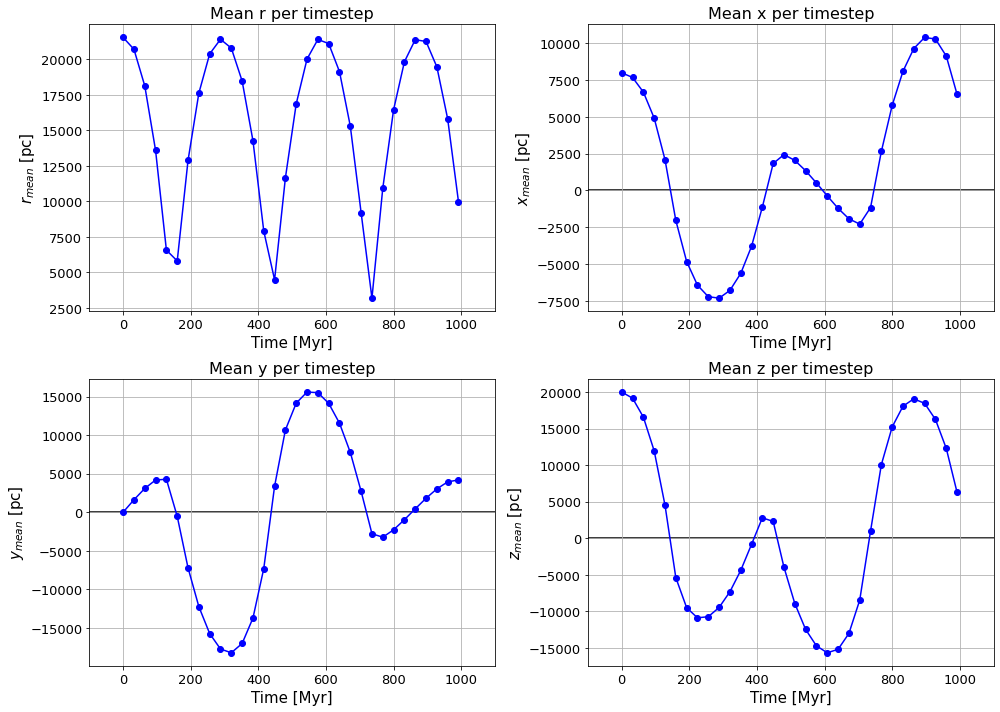

In [6]:
means_plots(which='pos', header_array=run_petar_test1_header, mean=r_mean_petar_test1, t_max=1000, run='ptest6', 
            fig_width=14, fig_height=10, save=True)

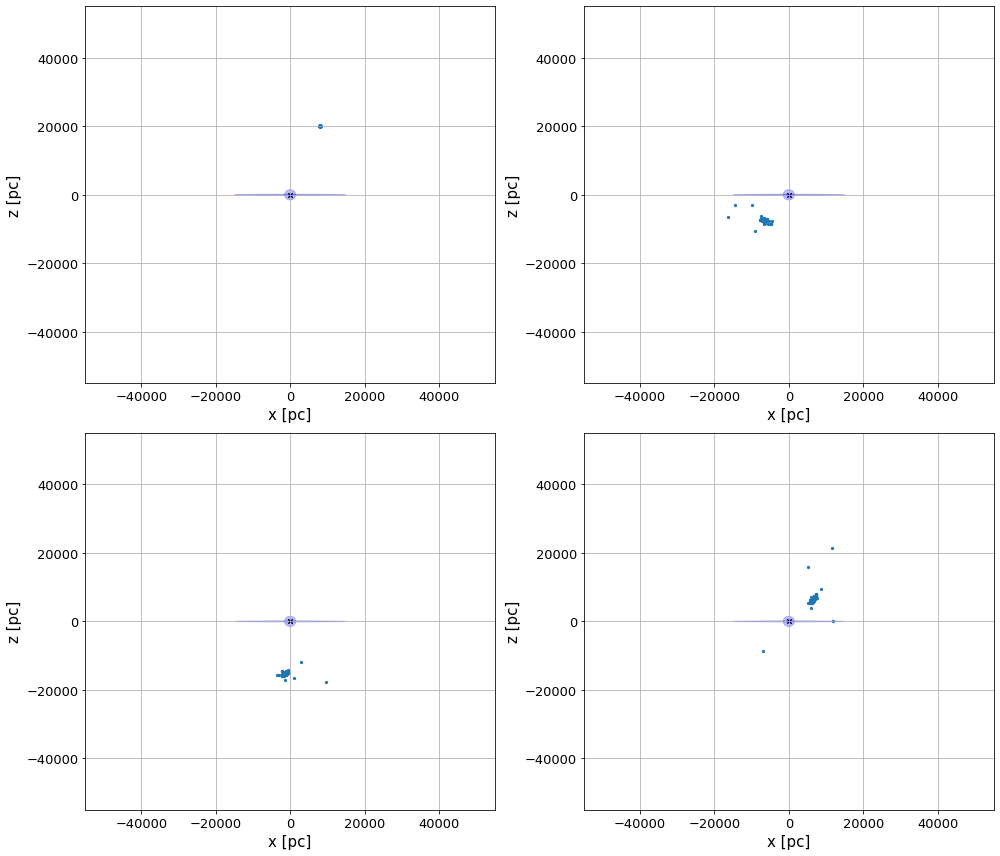

In [7]:
fig18, ax18 = plt.subplots(2, 2, figsize=(14,12))

xlimits = 55000
ylimits = 55000

ellipse1 = mpl.patches.Ellipse((0, 0), width=30000, height=300, color='b', alpha=0.25)
circle1 = mpl.patches.Circle((0, 0), 1500, color='b', alpha=0.25) #
#circle1 = mpl.patches.Circle((0, 0), 15000, color='b', alpha=0.25) #

ax18[0, 0].scatter(run_petar_test1_data[:, 1, 0], run_petar_test1_data[:, 3, 0], s=5)
ax18[0, 0].scatter(0, 0, s=20, marker='x', color='black')
ax18[0, 0].set_xlabel('x [pc]')
#ax18[0, 0].set_ylabel('y [pc]')
ax18[0, 0].set_ylabel('z [pc]')
ax18[0, 0].set_xlim(xmin=-xlimits, xmax=xlimits)
ax18[0, 0].set_ylim(ymin=-ylimits, ymax=ylimits)
ax18[0, 0].add_patch(circle1)
ax18[0, 0].add_patch(ellipse1)


ellipse2 = mpl.patches.Ellipse((0, 0), width=30000, height=300, color='b', alpha=0.25)
circle2 = mpl.patches.Circle((0, 0), 1500, color='b', alpha=0.25) #
#circle2 = mpl.patches.Circle((0, 0), 15000, color='b', alpha=0.25) #

ax18[0, 1].scatter(run_petar_test1_data[:, 1, 10], run_petar_test1_data[:, 3, 10], s=5)
ax18[0, 1].scatter(0, 0, s=20, marker='x', color='black')
ax18[0, 1].set_xlabel('x [pc]')
#ax18[0, 1].set_ylabel('y [pc]')
ax18[0, 1].set_ylabel('z [pc]')
ax18[0, 1].set_xlim(xmin=-xlimits, xmax=xlimits)
ax18[0, 1].set_ylim(ymin=-ylimits, ymax=ylimits)
ax18[0, 1].add_patch(circle2)
ax18[0, 1].add_patch(ellipse2)

ellipse3 = mpl.patches.Ellipse((0, 0), width=30000, height=300, color='b', alpha=0.25)
circle3 = mpl.patches.Circle((0, 0), 1500, color='b', alpha=0.25)
#circle3 = mpl.patches.Circle((0, 0), 15000, color='b', alpha=0.25) #


ax18[1, 0].scatter(run_petar_test1_data[:, 1, 20], run_petar_test1_data[:, 3, 20], s=5)
ax18[1, 0].scatter(0, 0, s=20, marker='x', color='black')
ax18[1, 0].set_xlabel('x [pc]')
#ax18[1, 0].set_ylabel('y [pc]')
ax18[1, 0].set_ylabel('z [pc]')
ax18[1, 0].set_xlim(xmin=-xlimits, xmax=xlimits)
ax18[1, 0].set_ylim(ymin=-ylimits, ymax=ylimits)
ax18[1, 0].add_patch(circle3)
ax18[1, 0].add_patch(ellipse3)

ellipse4 = mpl.patches.Ellipse((0, 0), width=30000, height=300, color='b', alpha=0.25)
circle4 = mpl.patches.Circle((0, 0), 1500, color='b', alpha=0.25) 
#circle4 = mpl.patches.Circle((0, 0), 15000, color='b', alpha=0.25) 

ax18[1, 1].scatter(run_petar_test1_data[:, 1, 31], run_petar_test1_data[:, 3, 31], s=5)
ax18[1, 1].scatter(0, 0, s=20, marker='x', color='black')
ax18[1, 1].set_xlabel('x [pc]')
#ax18[1, 1].set_ylabel('y [pc]')
ax18[1, 1].set_ylabel('z [pc]')
ax18[1, 1].set_xlim(xmin=-xlimits, xmax=xlimits)
ax18[1, 1].set_ylim(ymin=-ylimits, ymax=ylimits)
ax18[1, 1].add_patch(circle4)
ax18[1, 1].add_patch(ellipse4)

plt.tight_layout()
plt.show()

### Animations

In [232]:
print(run_petar_test1_data[:, 1, 31].shape)

(1000,)


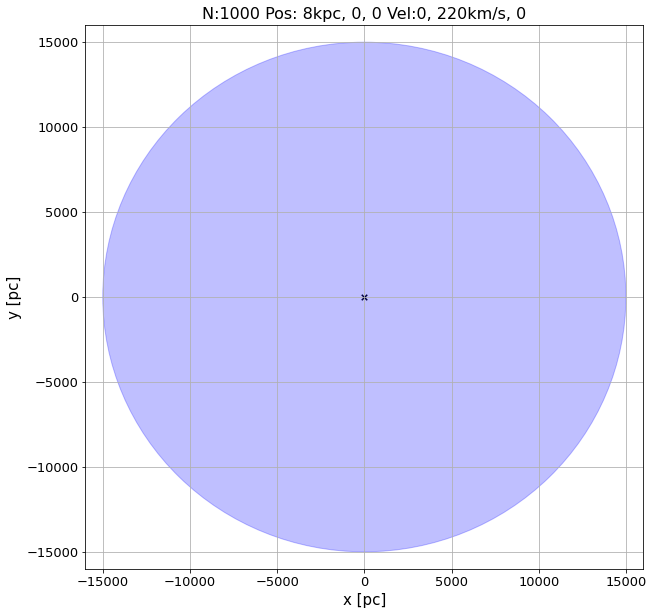

In [8]:
f_anim_ptest = np.arange(0, 31, 1)


fig_anim_ptest, ax_anim_ptest = plt.subplots(figsize=(10,10)) 
# = fig_anim_at_centre.add_subplot(projection = '3d')

scatter1, = ax_anim_ptest.plot([], [], c='b', marker='.', linestyle=' ') #s=20,

#ellipse = mpl.patches.Ellipse((0, 0), width=30000, height=30000, color='b', alpha=0.25)
circle = mpl.patches.Circle((0, 0), 15000, color='b', alpha=0.25) #mpl.patches.Circle((0, 0), 5000, color='b', alpha=0.25)

data = [scatter1]

#anim_color3d = mpl.colors.Normalize(vmin=0, vmax=1000)
#anim_cmap3d = mpl.cm.ScalarMappable(norm=anim_color3d, cmap=mpl.cm.cool)

my_text = ax_anim_ptest.text(-25000, 24000, '', fontsize=20) # test1: -14900, 14000

def init_anim_ptest(): 
    ax_anim_ptest.scatter(0, 0, s=30, marker='x', color='black')
    
    ax_anim_ptest.set_title('N:1000 Pos: 8kpc, 0, 0 Vel:0, 220km/s, 0')
    ax_anim_ptest.set_xlabel('x [pc]')
    ax_anim_ptest.set_ylabel('y [pc]')
    
    ax_anim_ptest.set_xlim(xmin=-16000, xmax=16000)
    ax_anim_ptest.set_ylim(ymin=-16000, ymax=16000)
    
    ax_anim_ptest.add_patch(circle)
    #ax_anim_ptest.add_patch(ellipse)
    
    plt.show()
    
    return data, 

def update_anim_ptest(frame):
    my_text.set_text(f't={frame*32}')
    #scatter1._offsets3d = (run_at_centre_data[:, 1, frame], run_at_centre_data[:, 2, frame], run_at_centre_data[:, 3, frame])
    
    #scatter_data = np.hstack((run_at_centre_data[:, :, frame], run_at_centre_data[:, :, frame], 
                              #run_at_centre_data[:, :, frame]))
    #scatter1.set_offsets(scatter_data) 
    data[0].set_data(np.array([run_petar_test1_data[:, 1, frame], run_petar_test1_data[:, 2, frame]]))
    
    return data, 



animation_plots_ptest = animation.FuncAnimation(fig_anim_ptest, update_anim_ptest, 
                                                    frames=f_anim_ptest, init_func=init_anim_ptest)

writervideo = animation.FFMpegWriter(fps=6)#PillowWriter(fps=6)
animation_plots_ptest.save('Anim_test_ptest8_cluster.mp4', writer=writervideo)

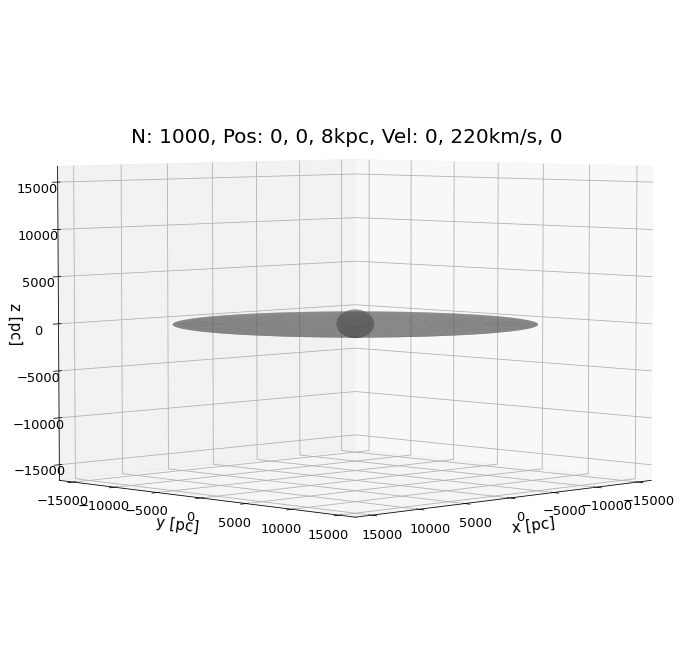

In [213]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x_bulge = 1500 * np.outer(np.cos(u), np.sin(v))
y_bulge = 1500 * np.outer(np.sin(u), np.sin(v))
z_bulge = 1500 * np.outer(np.ones(np.size(u)), np.cos(v))

x_disc = 14490 * np.outer(np.cos(u), np.sin(v))
y_disc = 14490 * np.outer(np.sin(u), np.sin(v))
z_disc = 300 * np.outer(np.ones(np.size(u)), np.cos(v))


z_min = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x_bulge, y_bulge, z_bulge, color='grey', alpha=0.5)
ax.plot_surface(x_disc, y_disc, z_disc, color='grey', alpha=0.5)
#ax.plot_surface(x_disc, y_disc, z_min, color='grey', alpha=0.75)
ax.set_xlim(-16000, 16000)
ax.set_ylim(-16000, 16000)
ax.set_zlim(-16000, 16000)
ax.view_init(4, 45)

ax.set_xlabel('x [pc]')
ax.set_ylabel('y [pc]')
ax.set_zlabel('z [pc]')
ax.set_title('N: 1000, Pos: 8kpc, 0, 0, Vel: 0, 220km/s, 0', fontsize=20, y=0.85)

# Set an equal aspect ratio
#ax.set_aspect('equal')

plt.show()

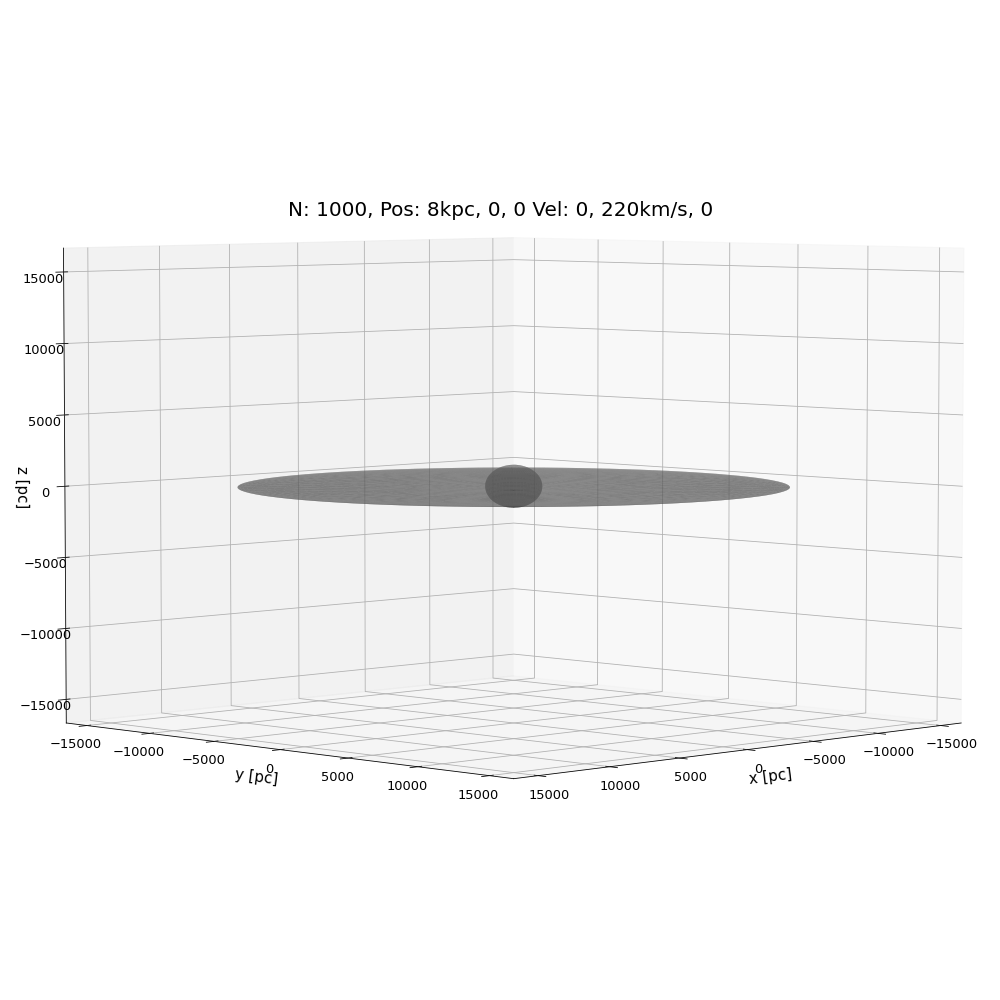

In [9]:
f_anim_ptest_3d = np.arange(0, 31, 1)


fig_anim_ptest_3d = plt.figure(figsize=(14,14)) 
ax_anim_ptest_3d = fig_anim_ptest_3d.add_subplot(projection = '3d')

scatter1 = ax_anim_ptest_3d.scatter([], [], [], c='b', s=5)

my_text = ax_anim_ptest_3d.text(-15500, 15500, 15500, '', fontsize=20)


u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x_bulge = 1500 * np.outer(np.cos(u), np.sin(v))
y_bulge = 1500 * np.outer(np.sin(u), np.sin(v))
z_bulge = 1500 * np.outer(np.ones(np.size(u)), np.cos(v))

x_disc = 14490 * np.outer(np.cos(u), np.sin(v))
y_disc = 14490 * np.outer(np.sin(u), np.sin(v))
z_disc = 300 * np.outer(np.ones(np.size(u)), np.cos(v))


#z_min = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
min_lim = -16000
max_lim = 16000

def init_anim_ptest_3d(): 
    ax_anim_ptest_3d.set_title('N: 1000, Pos: 8kpc, 0, 0 Vel: 0, 220km/s, 0', fontsize=20, y=0.85)
    ax_anim_ptest_3d.set_xlabel('x [pc]')
    ax_anim_ptest_3d.set_ylabel('y [pc]')
    ax_anim_ptest_3d.set_zlabel('z [pc]') 
    
    ax_anim_ptest_3d.set_xlim(xmin=min_lim, xmax=max_lim)
    ax_anim_ptest_3d.set_ylim(ymin=min_lim, ymax=max_lim)
    ax_anim_ptest_3d.set_zlim(zmin=min_lim, zmax=max_lim)
    
    # Plots Milky Way
    ax_anim_ptest_3d.plot_surface(x_bulge, y_bulge, z_bulge, color='grey', alpha=0.5)
    ax_anim_ptest_3d.plot_surface(x_disc, y_disc, z_disc, color='grey', alpha=0.5)
    
    ax_anim_ptest_3d.view_init(4, 45)
    
    plt.tight_layout()
    plt.show()
    
    return scatter1, 

def update_anim_ptest_3d(frame):
    my_text.set_text(f't={frame*32}')
    
    scatter1._offsets3d = (run_petar_test1_data[:, 1, frame], run_petar_test1_data[:, 2, frame], run_petar_test1_data[:, 3, frame])
    
    return scatter1, 



animation_plots_ptest_3d = animation.FuncAnimation(fig_anim_ptest_3d, update_anim_ptest_3d, 
                                                    frames=f_anim_ptest_3d, init_func=init_anim_ptest_3d)

writervideo = animation.FFMpegWriter(fps=6)#PillowWriter(fps=6)
animation_plots_ptest_3d.save('Anim_test_ptest6_3d_cluster.mp4', writer=writervideo)